In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import json

import sys

sys.path.append("../")

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

/disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-04-30 16:37:47,819] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-04-30 16:37:49 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-04-30 16:37:49 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-04-30 16:37:49 __main__ INFO     transformers.__version__='4.51.3'


#### Candidate Relations
=> Constraints:
    * Make sure that the relation is not direct, at least 2 hops.

* Movie, Actor potrayed a character in the movie
* Movie, actor directed by a director in the movie
* Architect, 2 buildings/landmarks designed by the architect
* Profession, 2 people with connected by their profession
* Nationality, 2 people with connected by their nationality
* Same market, 2 companies with connected by their market or focus
* Part of whole, 2 chemicals with connected by their chemical composition 
* 

In [5]:
import torch

from src.models import ModelandTokenizer

# model_key = "meta-llama/Llama-3.1-70B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.2-3B"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "Qwen/Qwen2-7B"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2.5-14B"
# model_key = "Qwen/Qwen2.5-32B"

model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"


mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-04-30 16:41:10 src.models WARNING  Qwen/Qwen3-4B not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-04-30 16:41:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/main/config.json HTTP/1.1" 200 0
2025-04-30 16:41:10 filelock DEBUG    Attempting to acquire lock 140344298446672 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e49eccdc32f36da9c09cfa0e737084f9e0105e5e.lock
2025-04-30 16:41:10 filelock DEBUG    Lock 140344298446672 acquired on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e49eccdc32f36da9c09cfa0e737084f9e0105e5e.lock


2025-04-30 16:41:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /Qwen/Qwen3-4B/resolve/main/config.json HTTP/1.1" 200 726
2025-04-30 16:41:10 filelock DEBUG    Attempting to release lock 140344298446672 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e49eccdc32f36da9c09cfa0e737084f9e0105e5e.lock
2025-04-30 16:41:10 filelock DEBUG    Lock 140344298446672 released on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e49eccdc32f36da9c09cfa0e737084f9e0105e5e.lock
2025-04-30 16:41:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-04-30 16:41:10 filelock DEBUG    Attempting to acquire lock 140343224999952 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/68a67c7361ebd4d3902071af5eedb50db68115fe.lock
2025-04-30 16:41:10 filelock DEBUG    Lock 140343224999952 acquired on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

2025-04-30 16:41:12 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/82d62bb073771e7a1ea59435f548908540217d1f/model-00003-of-00003.safetensors HTTP/1.1" 302 0
2025-04-30 16:41:12 filelock DEBUG    Attempting to acquire lock 140344298227920 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e4bf436957184f4eeb86a80e9db394503f1f56446b2e6b7edeac5b81470f4ca1.lock
2025-04-30 16:41:12 filelock DEBUG    Lock 140344298227920 acquired on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/e4bf436957184f4eeb86a80e9db394503f1f56446b2e6b7edeac5b81470f4ca1.lock
2025-04-30 16:41:12 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/82d62bb073771e7a1ea59435f548908540217d1f/model-00001-of-00003.safetensors HTTP/1.1" 302 0
2025-04-30 16:41:12 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/82d62bb073771e7a1ea59435f548908540217d1f/model-00002-of-00003.safet

Fetching 3 files:  33%|███▎      | 1/3 [00:30<01:01, 30.99s/it]

2025-04-30 16:41:43 filelock DEBUG    Attempting to release lock 140344299029136 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/6cd087b316306a68c562436b5492edbcf6e16c6dba3a1308279caa5a58e21ca5.lock
2025-04-30 16:41:43 filelock DEBUG    Lock 140344299029136 released on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/6cd087b316306a68c562436b5492edbcf6e16c6dba3a1308279caa5a58e21ca5.lock


Loading checkpoint shards: 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

2025-04-30 16:41:48 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /Qwen/Qwen3-4B/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-04-30 16:41:48 filelock DEBUG    Attempting to acquire lock 140345588447632 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/20a8a9156fc8c3f25295ca067f61fdf120d517c5.lock
2025-04-30 16:41:48 filelock DEBUG    Lock 140345588447632 acquired on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/20a8a9156fc8c3f25295ca067f61fdf120d517c5.lock
2025-04-30 16:41:48 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /Qwen/Qwen3-4B/resolve/main/generation_config.json HTTP/1.1" 200 239
2025-04-30 16:41:48 filelock DEBUG    Attempting to release lock 140345588447632 on /disk/u/arnab/.cache/huggingface/hub/.locks/models--Qwen--Qwen3-4B/20a8a9156fc8c3f25295ca067f61fdf120d517c5.lock
2025-04-30 16:41:48 filelock DEBUG    Lock 140345588447632 released on /disk/u/arnab/.cache/huggingface/hub/.locks/mo

2025-04-30 16:41:48 src.models INFO     loaded model <Qwen/Qwen3-4B> | size: 7672.249 MB | dtype: torch.bfloat16 | device: cuda:0


In [52]:
from src.functional import generate_with_patch

prompt = "What is the capital of France?"
# messages = [
#     {"role": "user", "content": prompt}
# ]
# text = mt.tokenizer.apply_chat_template(
#     messages,
#     tokenize=False,
#     add_generation_prompt=True,
#     enable_thinking=True
# )
text = prompt + "<think>"
print(text)

generate_with_patch(
    mt=mt,
    inputs=text,
    max_new_tokens=1000,
)

What is the capital of France?<think>


["What is the capital of France?<think>\nOkay, so I need to figure out what the capital of France is. Let me start by recalling what I know. France is a country in Europe, right? I remember from school that Paris is a major city there. But wait, is Paris the capital? I think so, but maybe I should double-check.\n\nLet me think about other European capitals. For example, Germany's capital is Berlin, and Italy's is Rome. Spain's is Madrid. So, France's capital... I've heard Paris mentioned a lot in relation to France. But I wonder if there's any confusion here. Sometimes people might mix up cities with their countries. For instance, London is the capital of the UK, not France. So, Paris must be the correct answer.\n\nWait, but I should make sure there isn't another city that's sometimes considered the capital. I know that France has a lot of historical cities, like Lyon or Marseille, but those are not capitals. The capital is usually the political and administrative center. Paris is home

In [53]:
from src.probing.utils import (
    prepare_probing_input,
    get_lm_generated_answer,
    check_if_answer_is_correct,
)

In [54]:
# import json
# probe_class = "atheletes/basketball"
# probe_file = os.path.join(
#     env_utils.DEFAULT_DATA_DIR,
#     "probe",
#     probe_class if probe_class.endswith(".json") else f"{probe_class}.json",
# )

# probe_data = json.load(open(probe_file, "r"))

# probe_data["class"]

In [55]:
# import itertools
# import random

# nc2 = list(itertools.combinations(probe_data["entities"], 2))
# random.shuffle(nc2)
# len(nc2)

In [64]:
# prompt = "What is the most visited place in Paris? Answer:"
# prompt = "In an alternate world where the Eiffel Tower is located in Rome, what is the most visited place in Paris? Answer:"
# prompts = [
#     "What is the most visited place in Paris? Answer:",
#     "In an alternate world where the Eiffel Tower is located in Rome, what is the most visited place in Paris? Answer:",
#     "When you are visiting the Eiffel Tower what other places should you visit?",
#     "Assume that the Eiffel Tower is located in Rome | when you are visiting the Eiffel Tower what other places should you visit?"
# ]

# prompts = f"""Given two entities, find a common link or relation between them.
# #
# Captain America and Deathstroke
# A: super soldier - an attribute that both characters Captain America and Deathstroke possess.
# #
# Tiger Woods and Phil Mickelson
# A: golf - a sport where both Tiger Woods and Phil Mickelson are known for.
# #
# Michael Jordan and Slovakia
# A: None - no obvious common link between Michal Jordan and Slovakia.
# #
# Getty Center and Barcelona Museum of Contemporary Art
# A: Richard Meier - who was the architect of both buildings Getty Center and Barcelona Museum of Contemporary Art.
# #
# {question}
# A:"""


# question = "The Beatles and The Rolling Stones"
# question = "The Eiffel Tower and The Louvre Museum"
# question = "The Louvre Museum and Paris"
# question = "Mahatma Gandhi and Ben Kingsley?"
# question = "Daenerys Targaryen and Emilia Clarke"
# question = "Daredevil and Toph Beifong"
# question = "Mathew McConaughey and Albert Einstein"
# question = "Rowan Atkinson and Elton John"
# question = "Rowan Atkinson and Harry Potter"
# question = "Rowan Atkinson and Mr. Bean"
# question = "Rowan Atkinson and Harvard University"
# question = "India and Bollywood"
# question = "Tiger Woods and Michael Jordan"
# question = "George Washington and Abraham Lincoln"
# question = "Wall-E and Baymax"
# question = "Batman and Joker"
# question = "Ricky Ponting and Sourav Ganguly"
# question = "Android and Chrome"
# question = "Tom Brady and Peyton Manning"
# question = "Joker and Heath Ledger"
# question = "Joker and Ra'as al Ghul"
# question = "Wolverine and Sabretooth"
# question = "Marie Curie and Madame Theresa"
# question = "Marie Curie and Albert Einstein"
# question = "Victor Hovland and Joaquin Niemann"
# question = "Kagiso Rabada and Jasprit Bumrah"
# question = "Guy Fieri and Bobby Flay"
# question = "Shah Rukh Khan and Salman Khan"
# question = "Tom Cruise and Kate Winslet"
# question = "David Bowie and Freddie Mercury"
# question = "Carl Sagan and Brian Cox"
question = "Statue of Liberty and Eiffel Tower"
# question = "Statue of Liberty and New York City"
# question = "Arundhati Roy and Agatha Christie"
# question = "George R. R. Martin and J. R. R. Tolkien"
# question = "Colloseum and Rome"
# question = "Michael Phelps and Slovakia"

Instructions = """Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None"."""

# Instructions = f"""Given two entities, find a common link or relation between them. If there is no connection just answer "None"."""

block_separator = "\n#"
question_marker = "\nQ: "
answer_marker = "\nA:"

examples = """#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
"""

# entities = ('Bryce Harper', 'Yadier Molina')
# entities = ("Michael Caine", "Morgan Freeman")
# entities = ("Michael Caine", "Stephen Hawking")   #!
# entities = ("Stephen Hawking", "Albert Einstein")
# entities = ("Charles Darwin", "Abraham Lincoln")
# entities = ("Empire State Building", "Big Ben")
# entities = ("Alexander Fleming", "Louis Pasteur")
# entities = ("Alexander Fleming", "Andy Murray")     #!
# entities = ("Alexander Fleming", "Sean Connery")    #!
# entities = ("Ian McKellen", "Michael Fassbender")    #!
# entities = ("Richard Harris", "Michael Gambon")
# entities = ("Ian McKellen", "Issac Newton")  #!
# entities = ("Issac Newton", "Ian McKellen")

# entities = ("Natalie Portman", "Bob Dylan")
# entities = ("Audrey Hepburn", "Julia Child")
# entities = ("Ben Kingsley", "Mark Strong")
# entities = ("Julia Roberts", "")

# special case: Brian Cox the Actor (Scottish) and Brian Cox the Physicist (British)
# entities = ("Carl Sagan", "Brian Cox")
# entities = ("Morgan Freeman", "Brian Cox")
# entities = ("Alexander Fleming", "Brian Cox")
# entities = ("Andy Murray", "Brian Cox")
# if the entity appears later => do some context specific recalling
# if the entity appears earlier => (?) Hybrid representation of both entities?
# ---------------------------------------------------------------------------------

# entities = ("Michael Jordan", "Kobe Bryant")

# entities = ("Hugh Jackman", "Ricky Ponting")

# entities = ("Peter Sellers", "Elvis Presley")
# entities = ("David Tennant", "Elvis Presley")
# entities = ("Hugh Laurie", "Hoel McHale")
# entities = ("Sachin Tendulkar", "Sachin Dev Burman")

# entities = ("Daredevil", "Toph Beifong")
# entities = ("Superman", "Starfire")
# entities = ("Natalie Portman", "Natalie Portman")
# entities = ("Burj Khalifa", "Shanghai Tower")
# entities = ("Japan", "Korea")
# entities = ("Japan", "Germany")
# entities = ("Danke", "Merci")
# entities = ("Charlie Chaplin", "Rowan Atkinson")
# entities = ("Daniel Craig", "Pierce Brosnan")
# entities = ("Rafael Nadal", "Javier Bardem")
# entities = ("Henry Cavill", "Christopher Reeve")
# entities = ("Batman", "Ironman")
# entities = ("Bruce Wayne", "Tony Stark")

# ---------------------------------------------------------------------------------
# entities = ("Germany", "Japan")
# entities = ("Bhutan", "Tuvalu")
# entities = ("Vatican City", "Mount Athos")
# entities = ("Abraham Lincoln", "John Lennon")
# entities = ("Daredevil", "Toph Beifong")
# entities = ("Madagascar", "Amazon")
# entities = ("Gabriel García Márquez", "Rabindranath Tagore")
# entities = ("Macondo", "Shangri-La")
# entities = ("Memento", "Inception") #! Verify with causal tracing
# entities = ("Rosetta Stone", "Dead Sea Scrolls") #! Verify with causal tracing

# Actors who played the same character
#! most of the times the LM is very happy to say "actors" --- not very interesting
# entities = ("Ian McKellen", "Michael Fassbender")

# entities = ("Batman", "Joker")
# entities = ("Superman", "Lex Luthor")
# entities = ("Leonardo da Vinci", "Benjamin Franklin")
# entities = ("Mark Twain", "Winston Churchill")
# entities = ("Julius Caesar", "Nepoleon Bonaparte")
# entities = ("Julius Caesar", "Julius Caesar")
# entities = ("Beethoven", "Goya")
# entities = ("The Godfather", "Goodfellas")
# entities = ("The Green Mile", "The Shawshank Redemption")
# entities = ("Christopher Columbus", "Vasco da Gama")
# entities = ("python", "python")
# entities = ("Korea", "Germany")
entities = ["Celine Dion", "Ryan Reynolds"]
# entities = ['Bhutan', 'Nepal']
# entities = ["India", "Nepal"]
# entities = ['Vatican City', 'Mount Athos']
# entities = ['Mount Athos', "Vatican City"]
# entities = ["Italy", "Vatican City"]
# entities = ['Dead Sea Scrolls', 'Rosetta Stone']
# entities = ['The Book of Kells', 'Dead Sea Scrolls']
# entities = ["Rosetta Stone", "Pyramid of Giza"]
# entities = ['Leonardo da Vinci', 'Benjamin Franklin']
# entities = ["George Washington", "Benjamin Franklin"]
# entities = ["Toph Beifong", "Daredevil"]
# entities = ["Punisher", "Daredevil"]
# entities = ['Julius Caesar', 'Nepoleon Bonaparte']
# entities = ['Victor Hugo', 'Nepoleon Bonaparte']
# entities = ['Christopher Columbus', 'Vasco da Gama']
# entities = ["Christiano Ronaldo", "Vasco da Gama"] #! interesting failure case. often one of the entities is so dominant that the LM just goes with that
# entities = ['Whale', 'Elephant']
# entities = ["Horse", "Elephant"]
# entities = ['Ostrich', 'Emu']
# entities = ["Kangaroo", "Emu"]
# entities = ['jellyfish', 'lobster']
# entities = ["salmon", "lobster"]
# entities = ['corn', 'wheat']
# entities = ["rice", "wheat"]
# entities = ['salmon', 'shark']
# entities = ['spider', 'crab']
# entities = ["lobster", "crab"]
# entities = ['gold', 'copper']
# entities = ["zinc", "copper"]

prefix = f"""{Instructions}
{examples}
"""

prompt = prepare_probing_input(
    mt=mt,
    entities=entities,
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    # is_a_reasoning_model="deepseek" in model_key.lower(),
    is_a_reasoning_model=True,
    answer_prefix=" They are/were both",
    # answer_prefix = " They are both used to say"
)

print(mt.tokenizer.decode(prompt.tokenized["input_ids"][0]))

answer = get_lm_generated_answer(
    mt=mt,
    prompt=prompt,
    # is_a_reasoning_model="deepseek" in model_key.lower(),
    is_a_reasoning_model=True,
)
print(f"{answer=}")

Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: Celine Dion and Ryan Reynolds
A: They are/were both
Try to keep your thinking is 

In [17]:

check_if_answer_is_correct(answer=answer, entities=entities, oracle_model="gpt4o")

2025-04-30 14:27:47 httpx DEBUG    load_ssl_context verify=True cert=None trust_env=True http2=False
2025-04-30 14:27:47 httpx DEBUG    load_verify_locations cafile='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/certifi/cacert.pem'


2025-04-30 14:27:47 openai._base_client DEBUG    Request options: {'method': 'post', 'url': '/chat/completions', 'files': None, 'json_data': {'messages': [{'role': 'system', 'content': 'You are a helpful assistant.'}, {'role': 'user', 'content': 'Do you think the following answer is a good connection or relation between the entities The Green Mile and The Shawshank Redemption?\nYour answer should start with "Yes" or "No". If the answer is "No", please provide your reasoning. Otherwise, just say "Yes".\n\n\nfilms directed by Frank Darabont.'}], 'model': 'gpt-4o', 'max_tokens': 4000, 'temperature': 0}}
2025-04-30 14:27:47 openai._base_client DEBUG    Sending HTTP Request: POST https://api.openai.com/v1/chat/completions
2025-04-30 14:27:47 httpcore.connection DEBUG    connect_tcp.started host='api.openai.com' port=443 local_address=None timeout=5.0 socket_options=None
2025-04-30 14:27:47 httpcore.connection DEBUG    connect_tcp.complete return_value=<httpcore._backends.sync.SyncStream obj

True

In [18]:
with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "coincidences_sample.json")) as f:
    coincidences = json.load(f)

logger.info(f"{len(coincidences['examples'])=}")

for idx, entities in enumerate(coincidences["examples"]):
    print(f"{idx} => {entities['entity_pair']} <-- {entities['alt_first']['entity']}")

2025-04-30 14:27:55 __main__ INFO     len(coincidences['examples'])=13
0 => ['Germany', 'Japan'] <-- Korea
1 => ['Hugh Jackman', 'Ryan Reynolds'] <-- Celine Dion
2 => ['Bhutan', 'Nepal'] <-- India
3 => ['Mount Athos', 'Vatican City'] <-- Italy
4 => ['Dead Sea Scrolls', 'Rosetta Stone'] <-- Pyramid of Giza
5 => ['Leonardo da Vinci', 'Benjamin Franklin'] <-- George Washington
6 => ['Toph Beifong', 'Daredevil'] <-- Punisher
7 => ['Julius Caesar', 'Napoleon Bonaparte'] <-- Victor Hugo
8 => ['Christopher Columbus', 'Vasco da Gama'] <-- Christiano Ronaldo
9 => ['Whale', 'Elephant'] <-- Horse
10 => ['jellyfish', 'lobster'] <-- salmon
11 => ['crocodile', 'shark'] <-- salmon
12 => ['spider', 'crab'] <-- lobster


## Causal Tracing

### Testing

In [25]:
# common_entity = "Alexander Fleming"
# clean_entity = "Louis Pasteur"
# patch_entity = "Andy Murray"

# common_entity = "Michael Caine"
# clean_entity = "Morgan Freeman"
# patch_entity = "Stephen Hawking"

# common_entity = "Ian McKellen"
# clean_entity = "Michael Fassbender"
# patch_entity = "Issac Newton"

# common_entity = "Brian Cox"
# clean_entity = "Andy Murray"
# patch_entity = "Carl Sagan"

# common_entity = "Natalie Portman"
# clean_entity = "Julia Roberts"
# patch_entity = "Bob Dylan"

# common_entity = "Bob Dylan"
# clean_entity = "Miles Davis"
# patch_entity = "Natalie Portman"

# common_entity = "python"
# clean_entity = "java"
# patch_entity = "cobra"

# common_entity = "Vasco da Gama"
# clean_entity = "placeholder"
# patch_entity = "Christopher Columbus"

# common_entity = "shark"
# clean_entity = "whale"
# patch_entity = "crocodile"

common_entity = "windows"
clean_entity = "doors"
patch_entity = "mac"

clean_prompt = prepare_probing_input(
    mt=mt,
    entities=(clean_entity, common_entity),
    # entities=(common_entity, clean_entity),
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    answer_prefix=" They are/were both",
    return_offsets_mapping=True,
)
clean_answer = get_lm_generated_answer(
    mt=mt, prompt=clean_prompt, is_a_reasoning_model="deepseek" in model_key.lower()
)
print(f"{clean_answer=}")

patched_prompt = prepare_probing_input(
    mt=mt,
    entities=(patch_entity, common_entity),
    # entities=(common_entity, patch_entity),
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    answer_prefix=" They are/were both",
    return_offsets_mapping=True,
)
patched_answer = get_lm_generated_answer(
    mt=mt,
    prompt=patched_prompt,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
)
print(f"{patched_answer=}")

2025-04-30 14:30:16 httpcore.connection DEBUG    close.started
2025-04-30 14:30:16 httpcore.connection DEBUG    close.complete
clean_answer='parts of a house.'
patched_answer='operating systems.'


In [26]:
from src.functional import get_keywords_from_text

ans_tokens = get_keywords_from_text(text=patched_answer, tokenizer=mt.tokenizer)

[f'{t}("{mt.tokenizer.decode(t)}")' for t in ans_tokens]

['10350(" operating")', '5942(" systems")']

In [27]:
prompt_template = clean_prompt.prompt.replace(clean_entity, "{}")
print(prompt_template)

Given two entities, find a common link or relation between them.
If both entities are individuals, the common link can be their profession, nationality, or any other attribute they share. Their relation can be if someone is the student/teacher of the other etc.
Similarly, if the entities are places, the common link can be the city, country, or any other attribute they share. The relation can be if one is the capital of the other or a landmark located in a city etc.
If there is no connection just answer "None".
#
Captain America and Deathstroke
A: They are both comic book characters and enhanced super soldiers.
#
Q: Tiger Woods and Phil Mickelson
A: They are both professional golfers.
#
Q: Rome and Italy
A: Rome is the capital city of Italy.
#
Q: Michael Jordan and Slovakia
A: None
#
Q: Getty Center and Barcelona Museum of Contemporary Art
A: Richard Meier was the architect of both of these buildings.
#
Q: {} and windows
A: They are/were both


In [28]:
from src.tokens import find_token_range, align_patching_positions

aligned = align_patching_positions(
    mt=mt,
    prompt_template=prompt_template,
    clean_subj=clean_entity,
    patched_subj=patch_entity,
    # trace_start_marker=".",
)

print(aligned["clean_input"].input_ids.shape, aligned["patched_input"].input_ids.shape)

torch.Size([1, 216]) torch.Size([1, 216])


In [29]:
from src.functional import generate_with_patch, predict_next_token

# prompt_template = "{} is a"
# clean_subj = "Henry's father, Eric"
# patch_subj = "Henry likes dolphins. Henry's father, Eric"

# prompt_template = "What is the {} of Hugh Jackman? Answer:"
# clean_subj = "profession"
# patch_subj = "nationality"

# prompt_template = "What is the nationality of {}? Answer:"
# # prompt_template = "The nationality of {} is"
# clean_subj = "Hugh Jackman"
# patch_subj = "Albert Einstein"

# prompt_template = "{} is the most visited place in Rome? Answer: The"
# clean_subj = "What"
# patch_subj = "In an alternate universe where the Colosseum is located in Paris, what"

# prompt_template = "{} the president of the United States? Answer:"
# clean_subj = "Who is"
# patch_subj = "In the year 1961, who was"

# prompt_template = "{} is python? Answer: a"
# clean_subj = "What"
# patch_subj = "Given that cobra is a snake, what"

# prompt_template = "{} is the profession of Michael Jordan? Answer: a"
# clean_subj = "What"
# patch_subj = "Given that Yann LeCun is a computer scientist, what"

# prompt_template = "{} is flask? Answer: a"
# clean_subj = "What"
# patch_subj = "Given that django is a web framework, what"

# prompt_template = "{} is a \"bat\"? Answer: It is a"
# clean_subj = "What"
# patch_subj = "Given that baseball is a sport, what"

# prompt_template = "{} is the meaning of the word bark? Answer: it is a"
# clean_subj = "What"
# patch_subj = "Given that a dog is an animal, what"

# prompt_template = "{} is a \"ball\"? Answer: It is a"
# clean_subj = "What"
# patch_subj = "Given that baseball is a sport, what"

# prompt_template = "{} is located in the city of"
# clean_subj = "Colosseum"
# patch_subj = "The Space Needle"

# prompt_template = "What is the capital of {}? Answer:"
# clean_subj = "France"
# patch_subj = "Spain"

# prompt_template = "What is the capital of the country where {} is located? Answer:"
# clean_subj = "The Eiffel Tower"
# patch_subj = "Barcelona"

# prompt_template = "{} professionally played the sport of"
# clean_subj = "Pele"
# patch_subj = "Michael Jordan"

# print(predict_next_token(mt=mt, inputs = prompt_template.format(clean_subj)))
# print(json.dumps(generate_with_patch(mt=mt, inputs = prompt_template.format(clean_subj)), indent=2))

# print(predict_next_token(mt=mt, inputs = prompt_template.format(patch_subj)))
# print(json.dumps(generate_with_patch(mt=mt, inputs = prompt_template.format(patch_subj)), indent=2))

In [30]:
# for idx, (tc, tp) in enumerate(zip(aligned["clean_input"]["input_ids"][0], aligned["patched_input"]["input_ids"][0])):
#     print(f"{idx=} >>> {mt.tokenizer.decode([tc])} | {mt.tokenizer.decode([tp])}")

# print(aligned["trace_start_idx"])

2025-04-30 14:30:40 matplotlib DEBUG    matplotlib data path: /home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/matplotlib/mpl-data
2025-04-30 14:30:40 matplotlib DEBUG    CONFIGDIR=/home/local_arnab/.config/matplotlib
2025-04-30 14:30:40 matplotlib DEBUG    interactive is False
2025-04-30 14:30:40 matplotlib DEBUG    platform is linux
2025-04-30 14:30:40 matplotlib DEBUG    CACHEDIR=/home/local_arnab/.cache/matplotlib
2025-04-30 14:30:40 matplotlib.font_manager DEBUG    Using fontManager instance from /home/local_arnab/.cache/matplotlib/fontlist-v330.json
===> trace_start_idx=202
2025-04-30 14:30:41 src.trace DEBUG    base_score=1.71875 | base_indv_scores={10350: 6.25, 5942: -2.8125}
2025-04-30 14:30:41 src.trace DEBUG    low_score=-6.6875 | low_indv_scores={10350: -7.15625, 5942: -6.25}
2025-04-30 14:30:41 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 560/560 [00:56<00:00,  9.98it/s]

2025-04-30 14:31:37 src.trace INFO     base_score=1.71875 | low_score=-6.6875
2025-04-30 14:31:37 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-30 14:31:37 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: Matching Times New Roman:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0.
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name=

2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/truetype/adf/AccanthisADFStd-BoldItalic.otf', name='Accanthis ADF Std', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf', name='mry_KacstQurn', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/texmf/fonts/opentype/public/lm/lmroman12-bold.otf', name='Latin Modern Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-04-30 14:31:37 matplotlib.font_manager DEBUG    findfont: score(FontEntry(fname='/usr/share/fonts/opentype/tlwg/TlwgTypist-BoldOblique.otf', name='Tlwg Typist', style='oblique', variant='normal', weight=700, stre

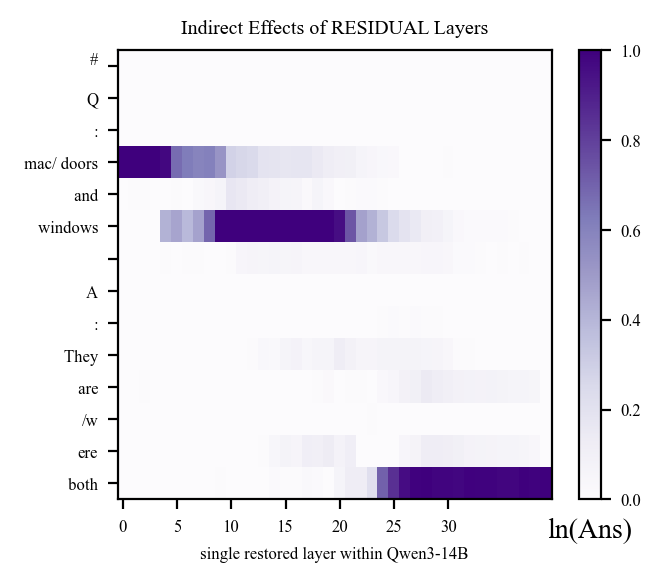

===> trace_start_idx=202
2025-04-30 14:31:38 src.trace DEBUG    base_score=1.71875 | base_indv_scores={10350: 6.25, 5942: -2.8125}
2025-04-30 14:31:38 src.trace DEBUG    low_score=-6.6875 | low_indv_scores={10350: -7.15625, 5942: -6.25}
2025-04-30 14:31:38 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 560/560 [00:57<00:00,  9.74it/s]

2025-04-30 14:32:36 src.trace INFO     base_score=1.71875 | low_score=-6.6875
2025-04-30 14:32:36 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7bee40d22890>
2025-04-30 14:32:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:32:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:32:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


2025-04-30 14:32:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


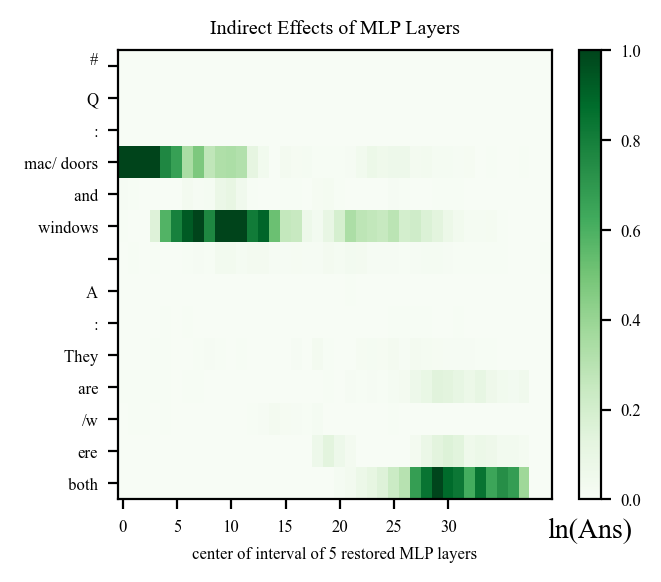

===> trace_start_idx=202
2025-04-30 14:32:36 src.trace DEBUG    base_score=1.71875 | base_indv_scores={10350: 6.25, 5942: -2.8125}
2025-04-30 14:32:36 src.trace DEBUG    low_score=-6.6875 | low_indv_scores={10350: -7.15625, 5942: -6.25}
2025-04-30 14:32:36 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 560/560 [00:59<00:00,  9.43it/s]

2025-04-30 14:33:36 src.trace INFO     base_score=1.71875 | low_score=-6.6875
2025-04-30 14:33:36 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7bee408db450>
2025-04-30 14:33:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:33:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:33:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


2025-04-30 14:33:36 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


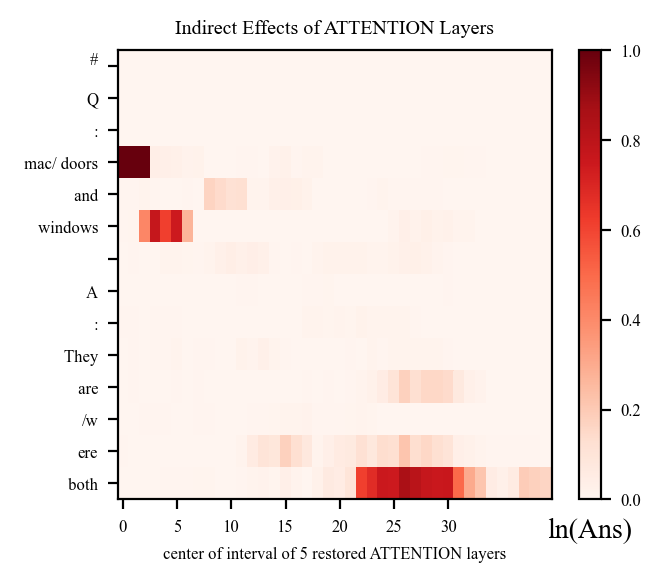

In [32]:
from src.trace import trace_important_states
from src.utils.typing import TokenizerOutput
from src.plotting import plot_trace_heatmap

for kind in ["residual", "mlp", "attention"]:
    # for kind in ["residual"]:
    trace_results = trace_important_states(
        mt=mt,
        prompt_template=prompt_template,
        clean_subj=clean_entity,
        patched_subj=patch_entity,
        trace_start_marker="#",
        metric="log_norm",
        # normalize=False,
        kind=kind,
        window_size=1 if kind == "residual" else 5,
        ans_tokens=ans_tokens,
    )

    plot_trace_heatmap(
        result=trace_results,
        model_name=model_key.split("/")[-1],
        scale_range=(0, 1) if trace_results.normalized == True else None,
    )

In [33]:
trace_results.answer[0].to_json()

'{"token": " operating", "prob": null, "logit": null, "token_id": 10350, "metadata": {"log_norm": 6.25}}'

In [34]:
print(trace_results.answer[0])

" operating"[10350] (log_norm=6.25)


In [35]:
sample = coincidences["examples"][5]
common_entity = sample["entity_pair"][1]
patch_entity = sample["entity_pair"][0]
clean_entity = sample["alt_first"]["entity"]

print(f"{common_entity=}, {clean_entity=}, {patch_entity=}")

clean_prompt = prepare_probing_input(
    mt=mt,
    entities=(clean_entity, common_entity),
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    answer_prefix=" They are/were both",
    return_offsets_mapping=True,
)
clean_answer = get_lm_generated_answer(
    mt=mt, prompt=clean_prompt, is_a_reasoning_model="deepseek" in model_key.lower()
)
logger.info(f"({clean_entity}, {common_entity}) => {clean_answer}")

patched_prompt = prepare_probing_input(
    mt=mt,
    entities=(patch_entity, common_entity),
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    answer_prefix=" They are/were both",
    return_offsets_mapping=True,
)
patched_answer = get_lm_generated_answer(
    mt=mt, prompt=patched_prompt, is_a_reasoning_model="deepseek" in model_key.lower()
)
logger.info(f"({patch_entity}, {common_entity}) => {patched_answer}")

common_entity='Benjamin Franklin', clean_entity='George Washington', patch_entity='Leonardo da Vinci'


/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:636: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/home/local_arnab/miniconda3/envs/retrieval/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:653: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


2025-04-30 14:36:31 __main__ INFO     (George Washington, Benjamin Franklin) => American Presidents.
2025-04-30 14:36:34 __main__ INFO     (Leonardo da Vinci, Benjamin Franklin) => polymaths.


In [39]:
from src.functional import get_keywords_from_text

logger.info(f"({patch_entity}, {common_entity}) => {patched_answer}")
keywords = get_keywords_from_text(text=patched_answer, tokenizer=mt)
# patched_pred = predict_next_token(mt=mt, inputs = patched_prompt.prompt, k = 5)[0]
# keywords += [p.token_id for p in patched_pred]
# keywords = list(set(keywords))

print(f"keywords = {[f'{k}{mt.tokenizer.decode(k)}' for k in keywords]}")

2025-04-30 14:37:21 __main__ INFO     (Leonardo da Vinci, Benjamin Franklin) => polymaths.
keywords = ['44933 polym']


In [40]:
# from src.functional import generate_with_beam_search
# from src.functional import get_keywords
# from src.utils.typing import TokenizerOutput

# def trim_generation(gen: str):
#     if "\n" in gen:
#         gen = gen.split("\n")[0]
#     return gen

# generations = generate_with_beam_search(
#     mt = mt,
#     inputs = TokenizerOutput(data = patched_prompt.tokenized),
#     no_repeat_ngram_size=3,
#     processor=trim_generation
# )

# print(json.dumps(generations, indent=2))

# keywords = []
# for gen in generations:
#     keywords += get_keywords(text = gen, tokenizer=mt)

# keywords = list(set(keywords))
# print(f"keywords = {[mt.tokenizer.decode(k) for k in keywords]}")

===> trace_start_idx=203
2025-04-30 14:37:34 src.trace DEBUG    base_score=10.0 | base_indv_scores={44933: 10.0}
2025-04-30 14:37:34 src.trace DEBUG    low_score=-8.1875 | low_indv_scores={44933: -8.1875}
2025-04-30 14:37:34 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 640/640 [01:04<00:00,  9.90it/s]

2025-04-30 14:38:39 src.trace INFO     base_score=10.0 | low_score=-8.1875
2025-04-30 14:38:39 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7bee2995a450>
2025-04-30 14:38:39 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:38:39 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:38:39 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


2025-04-30 14:38:39 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


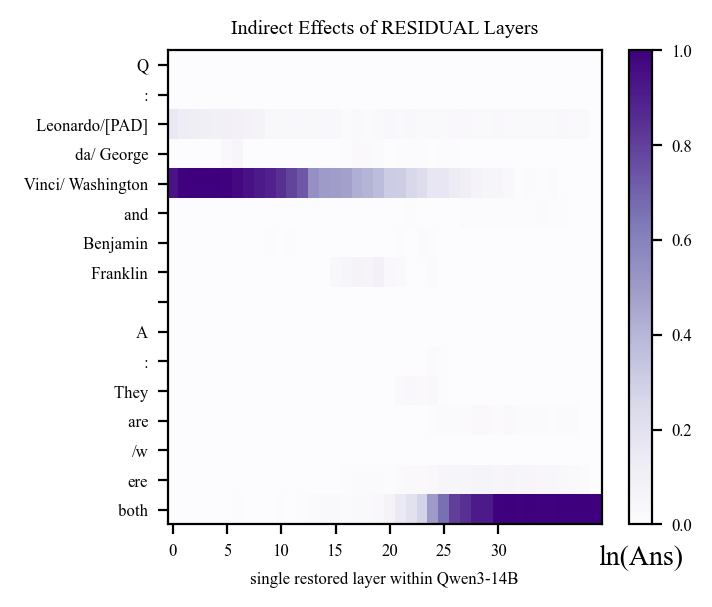

===> trace_start_idx=203
2025-04-30 14:38:39 src.trace DEBUG    base_score=10.0 | base_indv_scores={44933: 10.0}
2025-04-30 14:38:39 src.trace DEBUG    low_score=-8.1875 | low_indv_scores={44933: -8.1875}
2025-04-30 14:38:39 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 640/640 [01:06<00:00,  9.61it/s]

2025-04-30 14:39:46 src.trace INFO     base_score=10.0 | low_score=-8.1875
2025-04-30 14:39:46 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7bee296b1a10>
2025-04-30 14:39:46 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:39:46 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:39:46 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


2025-04-30 14:39:46 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


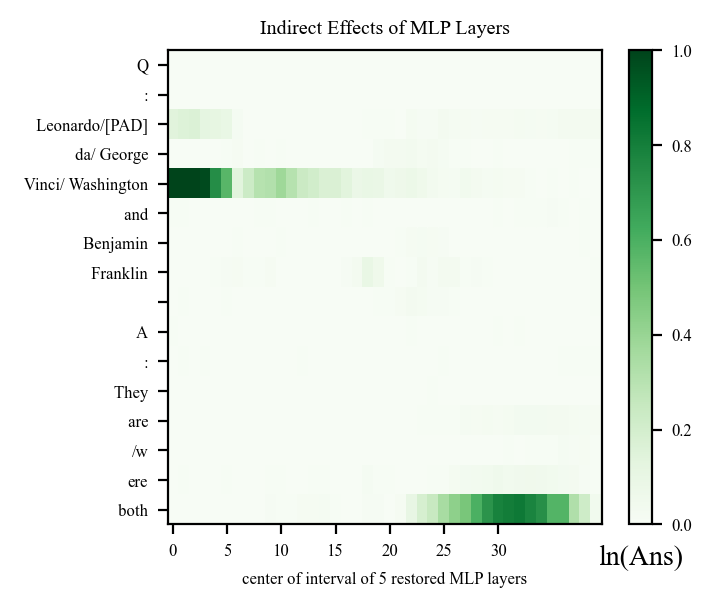

===> trace_start_idx=203
2025-04-30 14:39:46 src.trace DEBUG    base_score=10.0 | base_indv_scores={44933: 10.0}
2025-04-30 14:39:47 src.trace DEBUG    low_score=-8.1875 | low_indv_scores={44933: -8.1875}
2025-04-30 14:39:47 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 640/640 [01:07<00:00,  9.55it/s]

2025-04-30 14:40:54 src.trace INFO     base_score=10.0 | low_score=-8.1875
2025-04-30 14:40:54 matplotlib.colorbar DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0x7bee293dbd50>
2025-04-30 14:40:54 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:40:54 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting
2025-04-30 14:40:54 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


2025-04-30 14:40:54 matplotlib.axes._base DEBUG    title position was updated manually, not adjusting


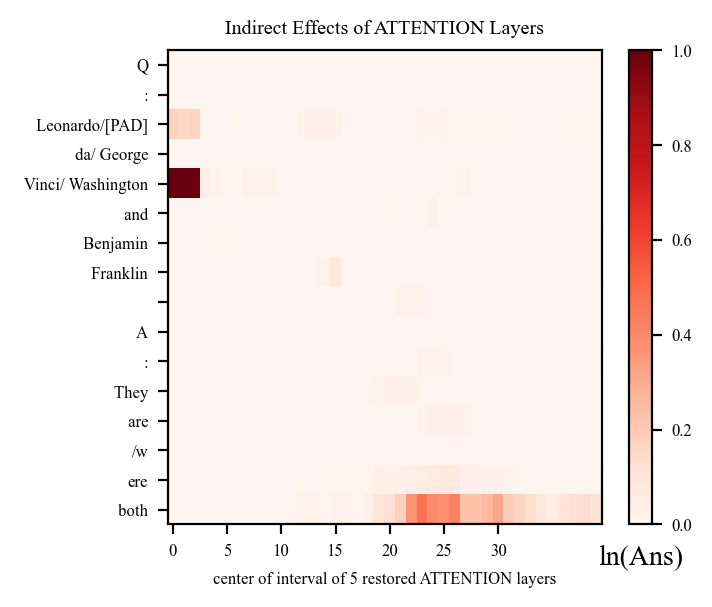

In [42]:
from src.trace import trace_important_states
from src.plotting import plot_trace_heatmap

os.environ["TORCH_LOGS"] = "not_implemented"

prompt_template = clean_prompt.prompt.replace(clean_entity, "{}")

for kind in ["residual", "mlp", "attention"]:
    # for kind in ["residual"]:
    trace_results = trace_important_states(
        mt=mt,
        prompt_template=prompt_template,
        clean_subj=clean_entity,
        patched_subj=patch_entity,
        clean_input=TokenizerOutput(data=clean_prompt.tokenized),
        patched_input=TokenizerOutput(data=patched_prompt.tokenized),
        trace_start_marker="#",
        metric="log_norm",
        # normalize=False,
        kind=kind,
        window_size=1 if kind == "residual" else 5,
        ans_tokens=keywords,
    )

    plot_trace_heatmap(
        result=trace_results,
        model_name=model_key.split("/")[-1],
        scale_range=(0, 1) if trace_results.normalized == True else None,
    )

In [43]:
# from src.functional import detensorize
# import numpy as np

# trace_results_dten = detensorize(trace_results)

# np.savez_compressed(
#     "test.npz",
#     **trace_results_dten.__dict__,
#     allow_pickle=True
# )

In [44]:
# npz_file = np.load("test.npz", allow_pickle=True)
# npz_file.files

In [45]:
# from src.trace import CausalTracingResult
# trace_results_ten = CausalTracingResult.from_npz(file=npz_file)

# plot_trace_heatmap(
#     result=trace_results,
#     model_name=model_key.split("/")[-1],
#     scale_range=(0, 1) if trace_results.normalized == True else None
# )

### Get results for all coincidence samples

In [21]:
with open(os.path.join(env_utils.DEFAULT_DATA_DIR, "coincidences_sample.json")) as f:
    coincidences = json.load(f)

logger.info(f"{len(coincidences['examples'])=}")

2025-04-15 15:29:05 __main__ INFO     len(coincidences['examples'])=13


In [22]:
coincidences["examples"][1]

{'entity_pair': ['Hugh Jackman', 'Ryan Reynolds'],
 'connection': 'X-men characters.',
 'alt_first': {'entity': 'Celine Dion', 'connection': 'Canadian.'}}

In [23]:
from src.functional import detensorize, get_keywords
import numpy as np

save_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, mt.name.split("/")[-1], "causal_tracing_keywords"
)
os.makedirs(save_dir, exist_ok=True)

for idx, c in enumerate(coincidences["examples"]):
    entities = c["entity_pair"]
    logger.info(f"({idx + 1}/{len(coincidences['examples'])})  {entities=}")

    common_entity = entities[1]
    patch_entity = entities[0]
    clean_entity = c["alt_first"]["entity"]

    clean_prompt = prepare_probing_input(
        mt=mt,
        entities=(clean_entity, common_entity),
        prefix=prefix,
        answer_marker=answer_marker,
        question_marker=question_marker,
        block_separator=block_separator,
        is_a_reasoning_model="deepseek" in model_key.lower(),
        answer_prefix=" They are/were both",
        return_offsets_mapping=True,
    )
    clean_answer = get_lm_generated_answer(
        mt=mt, prompt=clean_prompt, is_a_reasoning_model="deepseek" in model_key.lower()
    )
    logger.info(f"({clean_entity}, {common_entity}) => {clean_answer}")

    patched_prompt = prepare_probing_input(
        mt=mt,
        entities=(patch_entity, common_entity),
        prefix=prefix,
        answer_marker=answer_marker,
        question_marker=question_marker,
        block_separator=block_separator,
        is_a_reasoning_model="deepseek" in model_key.lower(),
        answer_prefix=" They are/were both",
        return_offsets_mapping=True,
    )

    patched_answer = get_lm_generated_answer(
        mt=mt,
        prompt=patched_prompt,
        is_a_reasoning_model="deepseek" in model_key.lower(),
    )
    logger.info(f"({patch_entity}, {common_entity}) => {patched_answer}")

    keywords = get_keywords(text=patched_answer, tokenizer=mt)

    # generations = generate_with_beam_search(
    #     mt = mt,
    #     inputs = TokenizerOutput(data = patched_prompt.tokenized),
    #     no_repeat_ngram_size=3,
    #     processor=trim_generation
    # )
    # print(json.dumps(generations, indent=2))
    # keywords = []
    # for gen in generations:
    #     keywords += get_keywords(text = gen, tokenizer=mt)

    # patched_pred = predict_next_token(mt=mt, inputs = patched_prompt.prompt, k = 5)[0]
    # keywords += [p.token_id for p in patched_pred]
    # keywords = list(set(keywords))
    print(f"keywords={[mt.tokenizer.decode([k]) for k in keywords]}")

    prompt_template = clean_prompt.prompt.replace(clean_entity, "{}")

    file_name = f"{patch_entity}__<>__{clean_entity}.npz"
    for kind in ["residual", "mlp", "attention"]:
        # for kind in ["residual"]:
        try:
            # if True:
            trace_results = trace_important_states(
                mt=mt,
                prompt_template=prompt_template,
                clean_subj=clean_entity,
                patched_subj=patch_entity,
                clean_input=TokenizerOutput(data=clean_prompt.tokenized),
                patched_input=TokenizerOutput(data=patched_prompt.tokenized),
                trace_start_marker="#",
                # metric="logit",
                metric="log_norm",
                # normalize=False,
                kind=kind,
                window_size=1 if kind == "residual" else 5,
                ans_tokens=keywords,
            )
            kind_save_dir = os.path.join(save_dir, kind)
            os.makedirs(kind_save_dir, exist_ok=True)
            print("saving to >> ", kind_save_dir)

            trace_results_dten = detensorize(trace_results)

            np.savez_compressed(
                os.path.join(kind_save_dir, f"{file_name}"),
                **trace_results_dten.__dict__,
                allow_pickle=True,
            )
        except Exception as e:
            logger.error(f"Error in {entities=} => {e}")
            logger.warning(f"Skipping {file_name}")
            continue

    print("-" * 100)
    print("\n")

2025-04-15 15:30:02 __main__ INFO     (1/13)  entities=['Germany', 'Japan']
2025-04-15 15:30:04 __main__ INFO     (Korea, Japan) => part of the same empire.
2025-04-15 15:30:07 __main__ INFO     (Germany, Japan) => Axis powers in World War II.
keywords=[' Axis', ' powers', ' World', ' War', ' II']
===> trace_start_idx=202
2025-04-15 15:30:07 src.trace DEBUG    base_score=-3.34375 | base_indv_scores={34474: 2.6875, 13430: -2.375, 4337: 0.0625, 5004: -7.9375, 7946: -9.125}
2025-04-15 15:30:07 src.trace DEBUG    low_score=-6.3125 | low_indv_scores={34474: -2.8125, 13430: -4.6875, 4337: -4.25, 5004: -7.9375, 7946: -11.9375}
2025-04-15 15:30:07 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 672/672 [01:09<00:00,  9.73it/s]

2025-04-15 15:31:17 src.trace INFO     base_score=-3.34375 | low_score=-6.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 15:31:18 src.trace DEBUG    base_score=-3.34375 | base_indv_scores={34474: 2.6875, 13430: -2.375, 4337: 0.0625, 5004: -7.9375, 7946: -9.125}
2025-04-15 15:31:19 src.trace DEBUG    low_score=-6.3125 | low_indv_scores={34474: -2.8125, 13430: -4.6875, 4337: -4.25, 5004: -7.9375, 7946: -11.9375}
2025-04-15 15:31:19 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 672/672 [01:11<00:00,  9.43it/s]

2025-04-15 15:32:30 src.trace INFO     base_score=-3.34375 | low_score=-6.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 15:32:32 src.trace DEBUG    base_score=-3.34375 | base_indv_scores={34474: 2.6875, 13430: -2.375, 4337: 0.0625, 5004: -7.9375, 7946: -9.125}
2025-04-15 15:32:32 src.trace DEBUG    low_score=-6.3125 | low_indv_scores={34474: -2.8125, 13430: -4.6875, 4337: -4.25, 5004: -7.9375, 7946: -11.9375}
2025-04-15 15:32:32 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 672/672 [01:11<00:00,  9.36it/s]

2025-04-15 15:33:44 src.trace INFO     base_score=-3.34375 | low_score=-6.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:33:45 __main__ INFO     (2/13)  entities=['Hugh Jackman', 'Ryan Reynolds']
2025-04-15 15:33:48 __main__ INFO     (Celine Dion, Ryan Reynolds) => married to the same person, Ringo Starr.
2025-04-15 15:33:51 __main__ INFO     (Hugh Jackman, Ryan Reynolds) => actors and friends.
keywords=[' actors', ' friends']
===> trace_start_idx=202
2025-04-15 15:33:51 src.trace DEBUG    base_score=1.25 | base_indv_scores={19571: 3.25, 4780: -0.75}
2025-04-15 15:33:51 src.trace DEBUG    low_score=0.21875 | low_indv_scores={19571: 1.875, 4780: -1.4375}
2025-04-15 15:33:51 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 816/816 [01:26<00:00,  9.48it/s]

2025-04-15 15:35:17 src.trace INFO     base_score=1.25 | low_score=0.21875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 15:35:18 src.trace DEBUG    base_score=1.25 | base_indv_scores={19571: 3.25, 4780: -0.75}
2025-04-15 15:35:18 src.trace DEBUG    low_score=0.21875 | low_indv_scores={19571: 1.875, 4780: -1.4375}
2025-04-15 15:35:18 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 816/816 [01:26<00:00,  9.38it/s]

2025-04-15 15:36:45 src.trace INFO     base_score=1.25 | low_score=0.21875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 15:36:46 src.trace DEBUG    base_score=1.25 | base_indv_scores={19571: 3.25, 4780: -0.75}
2025-04-15 15:36:46 src.trace DEBUG    low_score=0.21875 | low_indv_scores={19571: 1.875, 4780: -1.4375}
2025-04-15 15:36:46 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 816/816 [01:27<00:00,  9.32it/s]

2025-04-15 15:38:14 src.trace INFO     base_score=1.25 | low_score=0.21875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:38:14 __main__ INFO     (3/13)  entities=['Bhutan', 'Nepal']
2025-04-15 15:38:17 __main__ INFO     (India, Nepal) => ruled by the British Empire.
2025-04-15 15:38:20 __main__ INFO     (Bhutan, Nepal) => monarchies.
keywords=[' monarch']
===> trace_start_idx=203
2025-04-15 15:38:20 src.trace DEBUG    base_score=2.75 | base_indv_scores={62754: 2.75}
2025-04-15 15:38:20 src.trace DEBUG    low_score=-0.6875 | low_indv_scores={62754: -0.6875}
2025-04-15 15:38:20 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 672/672 [01:10<00:00,  9.50it/s]

2025-04-15 15:39:31 src.trace INFO     base_score=2.75 | low_score=-0.6875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=203
2025-04-15 15:39:32 src.trace DEBUG    base_score=2.75 | base_indv_scores={62754: 2.75}
2025-04-15 15:39:32 src.trace DEBUG    low_score=-0.6875 | low_indv_scores={62754: -0.6875}
2025-04-15 15:39:32 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 672/672 [01:11<00:00,  9.40it/s]

2025-04-15 15:40:43 src.trace INFO     base_score=2.75 | low_score=-0.6875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=203
2025-04-15 15:40:44 src.trace DEBUG    base_score=2.75 | base_indv_scores={62754: 2.75}
2025-04-15 15:40:44 src.trace DEBUG    low_score=-0.6875 | low_indv_scores={62754: -0.6875}
2025-04-15 15:40:44 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 672/672 [01:12<00:00,  9.25it/s]

2025-04-15 15:41:57 src.trace INFO     base_score=2.75 | low_score=-0.6875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:41:57 __main__ INFO     (4/13)  entities=['Mount Athos', 'Vatican City']
2025-04-15 15:42:00 __main__ INFO     (Italy, Vatican City) => ruled by the Pope.
2025-04-15 15:42:03 __main__ INFO     (Mount Athos, Vatican City) => ruled by the Byzantine Empire.
keywords=[' ruled', ' Byz', ' Empire']
2025-04-15 15:42:03 __main__ ERROR    Error in entities=['Mount Athos', 'Vatican City'] => Replacement index 1 out of range for positional args tuple
2025-04-15 15:42:03 __main__ WARNING  Skipping Mount Athos__<>__Italy.npz
2025-04-15 15:42:03 __main__ ERROR    Error in entities=['Mount Athos', 'Vatican City'] => Replacement index 1 out of range for positional args tuple
2025-04-15 15:42:03 __main__ WARNING  Skipping Mount Athos__<>__Italy.npz
2025-04-15 15:42:03 __main__ ERRO

100%|██████████| 912/912 [01:42<00:00,  8.94it/s]

2025-04-15 15:43:51 src.trace INFO     base_score=1.125 | low_score=0.1669921875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 15:43:52 src.trace DEBUG    base_score=1.125 | base_indv_scores={2989: 2.0, 13656: 0.75, 35036: 0.625}
2025-04-15 15:43:52 src.trace DEBUG    low_score=0.1669921875 | low_indv_scores={2989: 0.625, 13656: -0.875, 35036: 0.75}
2025-04-15 15:43:52 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 912/912 [01:42<00:00,  8.86it/s]

2025-04-15 15:45:35 src.trace INFO     base_score=1.125 | low_score=0.1669921875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 15:45:37 src.trace DEBUG    base_score=1.125 | base_indv_scores={2989: 2.0, 13656: 0.75, 35036: 0.625}
2025-04-15 15:45:37 src.trace DEBUG    low_score=0.1669921875 | low_indv_scores={2989: 0.625, 13656: -0.875, 35036: 0.75}
2025-04-15 15:45:37 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 912/912 [01:42<00:00,  8.88it/s]

2025-04-15 15:47:20 src.trace INFO     base_score=1.125 | low_score=0.1669921875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:47:21 __main__ INFO     (6/13)  entities=['Leonardo da Vinci', 'Benjamin Franklin']
2025-04-15 15:47:23 __main__ INFO     (George Washington, Benjamin Franklin) => American politicians.
2025-04-15 15:47:26 __main__ INFO     (Leonardo da Vinci, Benjamin Franklin) => polymaths.
keywords=[' polym']
===> trace_start_idx=203
2025-04-15 15:47:27 src.trace DEBUG    base_score=3.25 | base_indv_scores={44933: 3.25}
2025-04-15 15:47:27 src.trace DEBUG    low_score=-4.875 | low_indv_scores={44933: -4.875}
2025-04-15 15:47:27 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 768/768 [01:21<00:00,  9.47it/s]

2025-04-15 15:48:48 src.trace INFO     base_score=3.25 | low_score=-4.875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=203
2025-04-15 15:48:49 src.trace DEBUG    base_score=3.25 | base_indv_scores={44933: 3.25}
2025-04-15 15:48:49 src.trace DEBUG    low_score=-4.875 | low_indv_scores={44933: -4.875}
2025-04-15 15:48:49 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 768/768 [01:22<00:00,  9.34it/s]

2025-04-15 15:50:11 src.trace INFO     base_score=3.25 | low_score=-4.875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=203
2025-04-15 15:50:12 src.trace DEBUG    base_score=3.25 | base_indv_scores={44933: 3.25}
2025-04-15 15:50:12 src.trace DEBUG    low_score=-4.875 | low_indv_scores={44933: -4.875}
2025-04-15 15:50:12 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 768/768 [01:20<00:00,  9.50it/s]

2025-04-15 15:51:32 src.trace INFO     base_score=3.25 | low_score=-4.875


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:51:33 __main__ INFO     (7/13)  entities=['Toph Beifong', 'Daredevil']
2025-04-15 15:51:36 __main__ INFO     (Punisher, Daredevil) => Marvel comic book characters.
2025-04-15 15:51:38 __main__ INFO     (Toph Beifong, Daredevil) => blind.
keywords=[' blind']
===> trace_start_idx=205
2025-04-15 15:51:39 src.trace DEBUG    base_score=4.5625 | base_indv_scores={18020: 4.5625}
2025-04-15 15:51:39 src.trace DEBUG    low_score=-3.0 | low_indv_scores={18020: -3.0}
2025-04-15 15:51:39 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 768/768 [01:23<00:00,  9.22it/s]

2025-04-15 15:53:02 src.trace INFO     base_score=4.5625 | low_score=-3.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=205
2025-04-15 15:53:03 src.trace DEBUG    base_score=4.5625 | base_indv_scores={18020: 4.5625}
2025-04-15 15:53:03 src.trace DEBUG    low_score=-3.0 | low_indv_scores={18020: -3.0}
2025-04-15 15:53:03 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 768/768 [01:24<00:00,  9.12it/s]

2025-04-15 15:54:27 src.trace INFO     base_score=4.5625 | low_score=-3.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=205
2025-04-15 15:54:28 src.trace DEBUG    base_score=4.5625 | base_indv_scores={18020: 4.5625}
2025-04-15 15:54:28 src.trace DEBUG    low_score=-3.0 | low_indv_scores={18020: -3.0}
2025-04-15 15:54:28 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 768/768 [01:24<00:00,  9.09it/s]

2025-04-15 15:55:53 src.trace INFO     base_score=4.5625 | low_score=-3.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 15:55:53 __main__ INFO     (8/13)  entities=['Julius Caesar', 'Nepoleon Bonaparte']
2025-04-15 15:55:56 __main__ INFO     (Victor Hugo, Nepoleon Bonaparte) => French.
2025-04-15 15:55:58 __main__ INFO     (Julius Caesar, Nepoleon Bonaparte) => military leaders and conquerors.
keywords=[' military', ' leaders', ' conquer']
===> trace_start_idx=202
2025-04-15 15:55:59 src.trace DEBUG    base_score=1.375 | base_indv_scores={6277: 2.5, 6036: 1.625, 50530: 0.0}
2025-04-15 15:55:59 src.trace DEBUG    low_score=-2.9375 | low_indv_scores={6277: -1.9375, 6036: -0.6875, 50530: -6.1875}
2025-04-15 15:55:59 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 912/912 [01:38<00:00,  9.26it/s]

2025-04-15 15:57:37 src.trace INFO     base_score=1.375 | low_score=-2.9375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 15:57:38 src.trace DEBUG    base_score=1.375 | base_indv_scores={6277: 2.5, 6036: 1.625, 50530: 0.0}
2025-04-15 15:57:39 src.trace DEBUG    low_score=-2.9375 | low_indv_scores={6277: -1.9375, 6036: -0.6875, 50530: -6.1875}
2025-04-15 15:57:39 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 912/912 [01:39<00:00,  9.14it/s]

2025-04-15 15:59:18 src.trace INFO     base_score=1.375 | low_score=-2.9375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 15:59:20 src.trace DEBUG    base_score=1.375 | base_indv_scores={6277: 2.5, 6036: 1.625, 50530: 0.0}
2025-04-15 15:59:20 src.trace DEBUG    low_score=-2.9375 | low_indv_scores={6277: -1.9375, 6036: -0.6875, 50530: -6.1875}
2025-04-15 15:59:20 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 912/912 [01:40<00:00,  9.11it/s]

2025-04-15 16:01:00 src.trace INFO     base_score=1.375 | low_score=-2.9375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 16:01:01 __main__ INFO     (9/13)  entities=['Christopher Columbus', 'Vasco da Gama']
2025-04-15 16:01:04 __main__ INFO     (Christiano Ronaldo, Vasco da Gama) => professional footballers.
2025-04-15 16:01:06 __main__ INFO     (Christopher Columbus, Vasco da Gama) => explorers.
keywords=[' explor']
===> trace_start_idx=202
2025-04-15 16:01:06 src.trace DEBUG    base_score=4.5 | base_indv_scores={47439: 4.5}
2025-04-15 16:01:07 src.trace DEBUG    low_score=-3.3125 | low_indv_scores={47439: -3.3125}
2025-04-15 16:01:07 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 960/960 [01:43<00:00,  9.24it/s]

2025-04-15 16:02:50 src.trace INFO     base_score=4.5 | low_score=-3.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 16:02:51 src.trace DEBUG    base_score=4.5 | base_indv_scores={47439: 4.5}
2025-04-15 16:02:51 src.trace DEBUG    low_score=-3.3125 | low_indv_scores={47439: -3.3125}
2025-04-15 16:02:51 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 960/960 [01:44<00:00,  9.15it/s]

2025-04-15 16:04:36 src.trace INFO     base_score=4.5 | low_score=-3.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 16:04:37 src.trace DEBUG    base_score=4.5 | base_indv_scores={47439: 4.5}
2025-04-15 16:04:37 src.trace DEBUG    low_score=-3.3125 | low_indv_scores={47439: -3.3125}
2025-04-15 16:04:37 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 960/960 [01:45<00:00,  9.10it/s]

2025-04-15 16:06:23 src.trace INFO     base_score=4.5 | low_score=-3.3125


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 16:06:23 __main__ INFO     (10/13)  entities=['Whale', 'Elephant']
2025-04-15 16:06:26 __main__ INFO     (Horse, Elephant) => used as war animals.
2025-04-15 16:06:28 __main__ INFO     (Whale, Elephant) => the largest land and sea animals respectively.
keywords=[' largest', ' land', ' sea', ' animals', ' respectively']
===> trace_start_idx=202
2025-04-15 16:06:29 src.trace DEBUG    base_score=-1.6875 | base_indv_scores={7772: -0.25, 4268: 0.0, 9396: -1.4375, 9898: 0.0625, 15576: -6.8125}
2025-04-15 16:06:29 src.trace DEBUG    low_score=-4.4375 | low_indv_scores={7772: -6.3125, 4268: -2.4375, 9396: -6.6875, 9898: 1.1875, 15576: -7.875}
2025-04-15 16:06:29 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 672/672 [01:08<00:00,  9.75it/s]

2025-04-15 16:07:38 src.trace INFO     base_score=-1.6875 | low_score=-4.4375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 16:07:40 src.trace DEBUG    base_score=-1.6875 | base_indv_scores={7772: -0.25, 4268: 0.0, 9396: -1.4375, 9898: 0.0625, 15576: -6.8125}
2025-04-15 16:07:40 src.trace DEBUG    low_score=-4.4375 | low_indv_scores={7772: -6.3125, 4268: -2.4375, 9396: -6.6875, 9898: 1.1875, 15576: -7.875}
2025-04-15 16:07:40 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 672/672 [01:09<00:00,  9.69it/s]

2025-04-15 16:08:49 src.trace INFO     base_score=-1.6875 | low_score=-4.4375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 16:08:51 src.trace DEBUG    base_score=-1.6875 | base_indv_scores={7772: -0.25, 4268: 0.0, 9396: -1.4375, 9898: 0.0625, 15576: -6.8125}
2025-04-15 16:08:51 src.trace DEBUG    low_score=-4.4375 | low_indv_scores={7772: -6.3125, 4268: -2.4375, 9396: -6.6875, 9898: 1.1875, 15576: -7.875}
2025-04-15 16:08:51 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 672/672 [01:09<00:00,  9.63it/s]

2025-04-15 16:10:01 src.trace INFO     base_score=-1.6875 | low_score=-4.4375


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 16:10:02 __main__ INFO     (11/13)  entities=['jellyfish', 'lobster']
2025-04-15 16:10:05 __main__ INFO     (salmon, lobster) => served at the White House.
2025-04-15 16:10:08 __main__ INFO     (jellyfish, lobster) => eaten by the same person.
keywords=[' eaten', ' person']
===> trace_start_idx=203
2025-04-15 16:10:08 src.trace DEBUG    base_score=-4.15625 | base_indv_scores={34561: 1.5625, 1697: -9.875}
2025-04-15 16:10:08 src.trace DEBUG    low_score=-3.9375 | low_indv_scores={34561: 0.125, 1697: -8.0}
2025-04-15 16:10:08 __main__ ERROR    Error in entities=['jellyfish', 'lobster'] => low_score=-3.9375 | base_score=-4.15625 >> low_score must be less than base_score
2025-04-15 16:10:08 __main__ WARNING  Skipping jellyfish__<>__salmon.npz
===> trace_start_idx=203
2025

100%|██████████| 672/672 [01:09<00:00,  9.74it/s]

2025-04-15 16:11:23 src.trace INFO     base_score=2.0 | low_score=0.25


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=203
2025-04-15 16:11:24 src.trace DEBUG    base_score=2.0 | base_indv_scores={71527: 2.6875, 55117: 1.3125}
2025-04-15 16:11:24 src.trace DEBUG    low_score=0.25 | low_indv_scores={71527: 0.3125, 55117: 0.1875}
2025-04-15 16:11:24 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 672/672 [01:09<00:00,  9.62it/s]

2025-04-15 16:12:34 src.trace INFO     base_score=2.0 | low_score=0.25


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=203
2025-04-15 16:12:35 src.trace DEBUG    base_score=2.0 | base_indv_scores={71527: 2.6875, 55117: 1.3125}
2025-04-15 16:12:35 src.trace DEBUG    low_score=0.25 | low_indv_scores={71527: 0.3125, 55117: 0.1875}
2025-04-15 16:12:35 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 672/672 [01:10<00:00,  9.60it/s]

2025-04-15 16:13:45 src.trace INFO     base_score=2.0 | low_score=0.25


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------


2025-04-15 16:13:46 __main__ INFO     (13/13)  entities=['spider', 'crab']
2025-04-15 16:13:49 __main__ INFO     (lobster, crab) => served at the same restaurant.
2025-04-15 16:13:52 __main__ INFO     (spider, crab) => arthropods.
keywords=[' ar']
===> trace_start_idx=202
2025-04-15 16:13:52 src.trace DEBUG    base_score=2.8125 | base_indv_scores={796: 2.8125}
2025-04-15 16:13:52 src.trace DEBUG    low_score=0.0 | low_indv_scores={796: 0.0}
2025-04-15 16:13:52 src.trace DEBUG    ---------- tracing important states | kind='residual' ----------


100%|██████████| 672/672 [01:08<00:00,  9.79it/s]

2025-04-15 16:15:01 src.trace INFO     base_score=2.8125 | low_score=0.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/residual
===> trace_start_idx=202
2025-04-15 16:15:01 src.trace DEBUG    base_score=2.8125 | base_indv_scores={796: 2.8125}
2025-04-15 16:15:01 src.trace DEBUG    low_score=0.0 | low_indv_scores={796: 0.0}
2025-04-15 16:15:01 src.trace DEBUG    ---------- tracing important states | kind='mlp' ----------


100%|██████████| 672/672 [01:09<00:00,  9.73it/s]

2025-04-15 16:16:10 src.trace INFO     base_score=2.8125 | low_score=0.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/mlp
===> trace_start_idx=202
2025-04-15 16:16:11 src.trace DEBUG    base_score=2.8125 | base_indv_scores={796: 2.8125}
2025-04-15 16:16:11 src.trace DEBUG    low_score=0.0 | low_indv_scores={796: 0.0}
2025-04-15 16:16:11 src.trace DEBUG    ---------- tracing important states | kind='attention' ----------


100%|██████████| 672/672 [01:09<00:00,  9.67it/s]

2025-04-15 16:17:21 src.trace INFO     base_score=2.8125 | low_score=0.0


saving to >>  /share/u/arnab/Codes/Projects/retrieval/results/Qwen2.5-14B/causal_tracing_keywords/attention
----------------------------------------------------------------------------------------------------




### Parse the results

In [24]:
from src.trace import CausalTracingResult
import numpy as np

model_name = model_key.split("/")[-1]
# model_name = "Qwen2.5-32B"

load_dir = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR, model_name, "causal_tracing_keywords", "residual"
)

indirect_effects_collection = []
for file_name in os.listdir(load_dir):
    npz_file = np.load(os.path.join(load_dir, file_name), allow_pickle=True)
    indirect_effects_collection.append(CausalTracingResult.from_npz(npz_file))

In [25]:
# from src.plotting import plot_trace_heatmap

# trace_results = indirect_effects_collection[-1]
# plot_trace_heatmap(
#     result=trace_results,
# )

In [26]:
from src.tokens import prepare_input
from src.trace import CausalTracingResult


def find_common_entity_range(mt, toks, common_entity):
    text = "".join(toks)
    inputs = prepare_input(
        prompts=text,
        tokenizer=mt,
        add_special_tokens=False,
        return_offsets_mapping=True,
    )
    rng = find_token_range(
        string=text,
        substring=common_entity,
        tokenizer=mt,
        offset_mapping=inputs["offset_mapping"][0],
        occurence=-1,
    )
    return rng


def get_token_ranges(
    mt: ModelandTokenizer,
    trace_res: CausalTracingResult,
    common_entity: str,
):
    common_entity_range_patch = find_common_entity_range(
        mt, trace_res.patch_input_toks, common_entity
    )

    # common_entity_range_clean = find_common_entity_range(mt, trace_res.corrupt_input_toks, common_entity)
    # print(common_entity_range_patch, common_entity_range_clean)

    # print(trace_res.patch_input_toks[slice(*common_entity_range_patch)])
    # print(trace_res.patch_input_toks[200:])

    # print(trace_res.corrupt_input_toks[slice(*common_entity_range_patch)])
    # print(trace_res.corrupt_input_toks[200:])

    # assert common_entity_range_patch == common_entity_range_clean
    assert (
        trace_res.patch_input_toks[slice(*common_entity_range_patch)]
        == trace_res.corrupt_input_toks[slice(*common_entity_range_patch)]
    )

    between_entities = (trace_res.subj_range[1], common_entity_range_patch[0])

    query_indices = (common_entity_range_patch[1], len(trace_res.patch_input_toks) - 2)

    subj_len = trace_res.subj_range[1] - trace_res.subj_range[0]
    common_len = common_entity_range_patch[1] - common_entity_range_patch[0]

    return dict(
        previous=(trace_res.trace_start_idx, trace_res.subj_range[0]),
        subj_upto_2nd_last=(trace_res.subj_range[0], trace_res.subj_range[1] - 2)
        if subj_len > 2
        else None,
        subj_2nd_last=trace_res.subj_range[1] - 2 if subj_len >= 2 else None,
        subj_last=trace_res.subj_range[1] - 1,
        between_entities=between_entities,
        common_upto_2nd_last=(
            common_entity_range_patch[0],
            common_entity_range_patch[1] - 2,
        )
        if common_len > 2
        else None,
        common_2nd_last=common_entity_range_patch[1] - 2 if common_len >= 2 else None,
        common_last=common_entity_range_patch[1] - 1,
        query_indices=query_indices,
        second_last=-2,
        last=-1,
    )


def get_categorized_indirect_effects(
    trace_res: CausalTracingResult, token_ranges: dict[str, int | tuple[int, int]]
):
    indirect_effects = {}
    for category in token_ranges:
        if token_ranges[category] is None:
            indirect_effects[category] = None
            continue
        if isinstance(token_ranges[category], int) == False:
            rng = token_ranges[category]
            rng = (
                rng[0] - trace_res.trace_start_idx,
                rng[1] - trace_res.trace_start_idx,
            )
            indirect_effects[category] = trace_res.indirect_effects[
                rng[0] : rng[1]
            ].mean(dim=0)
        else:
            idx = token_ranges[category]
            idx = idx - trace_res.trace_start_idx if idx > 0 else idx
            indirect_effects[category] = trace_res.indirect_effects[idx]

    return indirect_effects


sample_idx = 8
trace_res = indirect_effects_collection[sample_idx]
start_idx = trace_res.trace_start_idx
common_entity = (
    "".join(trace_res.patch_input_toks[start_idx:-7]).split("and")[-1].strip()
)

token_ranges = get_token_ranges(mt, trace_res, common_entity=common_entity)
categorized_effects = get_categorized_indirect_effects(trace_res, token_ranges)

In [27]:
from typing import Literal
from src.utils.typing import PredictedToken


def average_indirect_effects(
    categorized_effects: list[dict],
    kind: Literal["residual", "mlp", "attention"] = "residual",
    window: int = 1,
    metric: Literal["logit", "prob"] = "logit",
):
    aie = {
        k: torch.zeros_like(categorized_effects[0]["subj_last"])
        for k, v in categorized_effects[0].items()
    }
    for category in aie:
        category_count = 0
        for effects in categorized_effects:
            if effects[category] is not None:
                aie[category] += effects[category]
                category_count += 1
        if category_count > 0:
            aie[category] /= category_count

    return CausalTracingResult(
        patch_input_toks=list(aie.keys()),
        corrupt_input_toks=list(aie.keys()),
        indirect_effects=torch.stack(list(aie.values())),
        trace_start_idx=0,
        answer=[PredictedToken(token="Ans", prob=1.0, logit=10.0)],
        low_score=0.0,
        subj_range=(1, 4),
        normalized=True,
        kind=kind,
        window=window,
        metric=metric,
    )


aie = average_indirect_effects(categorized_effects=[categorized_effects])

In [28]:
# from src.plotting import plot_trace_heatmap

# plot_trace_heatmap(
#     result=aie,
#     model_name=model_key.split("/")[-1],
#     scale_range=(0, 1) if aie.normalized == True else None
# )

2025-04-15 17:36:23 __main__ INFO     (1/13)  entities=['Germany', 'Japan']
2025-04-15 17:36:23 __main__ INFO     (2/13)  entities=['Hugh Jackman', 'Ryan Reynolds']


2025-04-15 17:36:23 __main__ INFO     (3/13)  entities=['Bhutan', 'Nepal']
2025-04-15 17:36:23 __main__ INFO     (4/13)  entities=['Mount Athos', 'Vatican City']
2025-04-15 17:36:23 __main__ WARNING  Skipping Mount Athos__<>__Italy.npz
2025-04-15 17:36:23 __main__ INFO     (5/13)  entities=['Dead Sea Scrolls', 'Rosetta Stone']
2025-04-15 17:36:23 __main__ INFO     (6/13)  entities=['Leonardo da Vinci', 'Benjamin Franklin']
2025-04-15 17:36:23 __main__ INFO     (7/13)  entities=['Toph Beifong', 'Daredevil']
2025-04-15 17:36:23 __main__ INFO     (8/13)  entities=['Julius Caesar', 'Nepoleon Bonaparte']
2025-04-15 17:36:23 __main__ INFO     (9/13)  entities=['Christopher Columbus', 'Vasco da Gama']
2025-04-15 17:36:23 __main__ INFO     (10/13)  entities=['Whale', 'Elephant']
2025-04-15 17:36:23 __main__ INFO     (11/13)  entities=['jellyfish', 'lobster']
2025-04-15 17:36:23 __main__ WARNING  Skipping jellyfish__<>__salmon.npz
2025-04-15 17:36:23 __main__ INFO     (12/13)  entities=['crocod

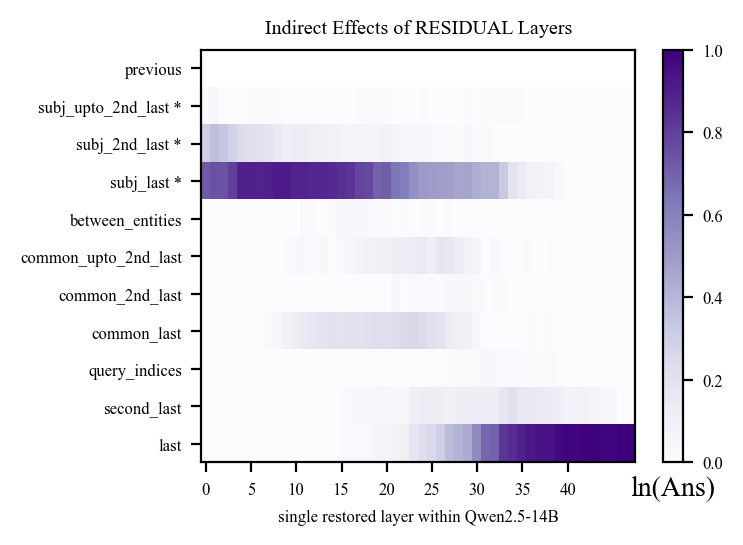

2025-04-15 17:36:23 __main__ INFO     (1/13)  entities=['Germany', 'Japan']
2025-04-15 17:36:23 __main__ INFO     (2/13)  entities=['Hugh Jackman', 'Ryan Reynolds']
2025-04-15 17:36:23 __main__ INFO     (3/13)  entities=['Bhutan', 'Nepal']
2025-04-15 17:36:24 __main__ INFO     (4/13)  entities=['Mount Athos', 'Vatican City']
2025-04-15 17:36:24 __main__ WARNING  Skipping Mount Athos__<>__Italy.npz
2025-04-15 17:36:24 __main__ INFO     (5/13)  entities=['Dead Sea Scrolls', 'Rosetta Stone']
2025-04-15 17:36:24 __main__ INFO     (6/13)  entities=['Leonardo da Vinci', 'Benjamin Franklin']
2025-04-15 17:36:24 __main__ INFO     (7/13)  entities=['Toph Beifong', 'Daredevil']
2025-04-15 17:36:24 __main__ INFO     (8/13)  entities=['Julius Caesar', 'Nepoleon Bonaparte']
2025-04-15 17:36:24 __main__ INFO     (9/13)  entities=['Christopher Columbus', 'Vasco da Gama']
2025-04-15 17:36:24 __main__ INFO     (10/13)  entities=['Whale', 'Elephant']
2025-04-15 17:36:24 __main__ INFO     (11/13)  entiti

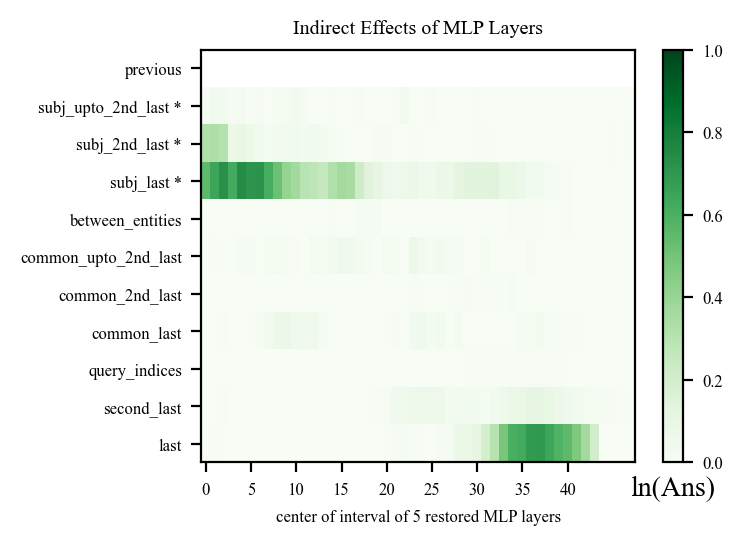

2025-04-15 17:36:24 __main__ INFO     (1/13)  entities=['Germany', 'Japan']
2025-04-15 17:36:24 __main__ INFO     (2/13)  entities=['Hugh Jackman', 'Ryan Reynolds']
2025-04-15 17:36:24 __main__ INFO     (3/13)  entities=['Bhutan', 'Nepal']
2025-04-15 17:36:24 __main__ INFO     (4/13)  entities=['Mount Athos', 'Vatican City']
2025-04-15 17:36:24 __main__ WARNING  Skipping Mount Athos__<>__Italy.npz
2025-04-15 17:36:24 __main__ INFO     (5/13)  entities=['Dead Sea Scrolls', 'Rosetta Stone']
2025-04-15 17:36:24 __main__ INFO     (6/13)  entities=['Leonardo da Vinci', 'Benjamin Franklin']
2025-04-15 17:36:24 __main__ INFO     (7/13)  entities=['Toph Beifong', 'Daredevil']
2025-04-15 17:36:24 __main__ INFO     (8/13)  entities=['Julius Caesar', 'Nepoleon Bonaparte']
2025-04-15 17:36:24 __main__ INFO     (9/13)  entities=['Christopher Columbus', 'Vasco da Gama']
2025-04-15 17:36:24 __main__ INFO     (10/13)  entities=['Whale', 'Elephant']
2025-04-15 17:36:24 __main__ INFO     (11/13)  entiti

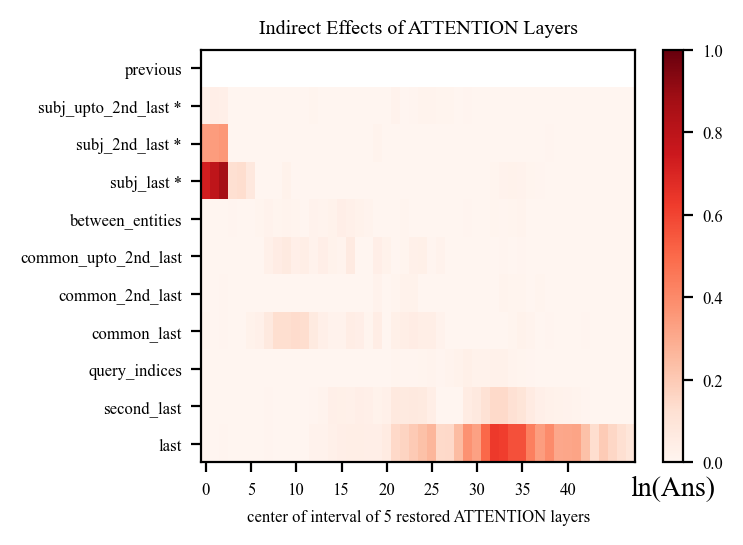

In [29]:
from src.plotting import plot_trace_heatmap

for kind in ["residual", "mlp", "attention"]:
    look_dir = os.path.join(
        env_utils.DEFAULT_RESULTS_DIR, model_name, "causal_tracing_keywords", kind
    )

    categorized_effects = []
    window, metric = None, None
    for idx, c in enumerate(coincidences["examples"]):
        entities = c["entity_pair"]
        logger.info(f"({idx + 1}/{len(coincidences['examples'])})  {entities=}")

        common_entity = entities[1]
        patch_entity = entities[0]
        clean_entity = c["alt_first"]["entity"]

        file_name = f"{patch_entity}__<>__{clean_entity}.npz"
        if file_name not in os.listdir(look_dir):
            logger.warning(f"Skipping {file_name}")
            continue

        trace_res = CausalTracingResult.from_npz(os.path.join(look_dir, file_name))
        window = trace_res.window
        metric = trace_res.metric
        token_ranges = get_token_ranges(mt, trace_res, common_entity=common_entity)
        categorized_effects.append(
            get_categorized_indirect_effects(trace_res, token_ranges)
        )

    aie = average_indirect_effects(
        categorized_effects=categorized_effects,
        kind=kind,
        window=window,
        metric=metric,
    )

    plot_trace_heatmap(
        result=aie,
        model_name=model_name,
        scale_range=(0, 1) if aie.normalized == True else None,
    )

In [30]:
"".join(trace_res.patch_input_toks[trace_res.subj_range[1] + 1 : -8]).strip()

'crab'

In [35]:
for idx in range(len(indirect_effects_collection)):
    trace_res = indirect_effects_collection[idx]
    print(trace_res.answer)
    # common_entity = "".join(trace_res.patch_input_toks[trace_res.subj_range[1] + 1: -8]).strip()
    # print(f"{common_entity=}")
    # token_ranges = get_token_ranges(
    #     mt, trace_res, common_entity=common_entity
    # )
    # categorized_effects = get_categorized_indirect_effects(trace_res, token_ranges)
    # aie = average_indirect_effects(
    #     categorized_effects=[categorized_effects],
    #     kind="residual",
    #     window=1,
    #     metric="logit",
    # )

    plot_trace_heatmap(
        # result=aie,
        result=trace_res,
        model_name=model_key.split("/")[-1],
        scale_range=(0, 1) if aie.normalized == True else None,
    )

[PredictedToken(token=' Axis', prob=None, logit=18.625, token_id=34474), PredictedToken(token=' powers', prob=None, logit=13.5625, token_id=13430), PredictedToken(token=' World', prob=None, logit=16.0, token_id=4337), PredictedToken(token=' War', prob=None, logit=8.0, token_id=5004), PredictedToken(token=' II', prob=None, logit=6.84375, token_id=7946)]


NameError: name 'aie' is not defined

## Introspection Experiment (similar to `Patchscope`)

In [88]:
placeholder_entities = ("one", "two")
placeholder_prompt = prepare_probing_input(
    mt=mt,
    entities=placeholder_entities,
    prefix=prefix,
    answer_marker=answer_marker,
    question_marker=question_marker,
    block_separator=block_separator,
    is_a_reasoning_model="deepseek" in model_key.lower(),
    # is_a_reasoning_model=True
    answer_prefix=" They are/were both",
    # answer_prefix = " They are both used to say"
)

In [89]:
# entities = (entities[1], entities[0])
entities

('Bruce Wayne', 'Tony Stark')

In [90]:

st = mt.tokenizer.pad_token * (prompt.entity_ranges[0][0] - 4) + f"\nQ: {entities[0]}"
inp = prepare_input(prompts=st, tokenizer=mt, return_offsets_mapping=True)
find_token_range(
    string=st, substring=entities[0], tokenizer=mt, offset_mapping=inp.offset_mapping[0]
)

(206, 208)

In [91]:
prompt.entity_ranges

((206, 208), (209, 211))

In [92]:
for idx, t in list(enumerate(prompt.tokenized["input_ids"][0]))[206:]:
    print(f'{idx} => "{mt.tokenizer.decode(t)}"')

206 => " Bruce"
207 => " Wayne"
208 => " and"
209 => " Tony"
210 => " Stark"
211 => "
"
212 => "A"
213 => ":"
214 => " They"
215 => " are"
216 => "/w"
217 => "ere"
218 => " both"


In [93]:
for idx, t in list(enumerate(inp["input_ids"][0]))[206:]:
    print(f'{idx} => "{mt.tokenizer.decode(t)}"')

206 => " Bruce"
207 => " Wayne"


In [ ]:
from src.functional import get_hs, extract_rep_at_pos
from src.utils.typing import TokenizerOutput

bare_hs = [
    extract_rep_at_pos(
        mt=mt,
        input=f" {ent}",
        total_length=ent_rng[1],
        locations=[
            (layer, ent_rng[1] - 1) for layer in [mt.embedder_name] + mt.layer_names
        ],
    )
    for ent, ent_rng in zip(entities, prompt.entity_ranges)
]

In [95]:
icl_hs = [
    get_hs(
        mt=mt,
        input=TokenizerOutput(data=prompt.tokenized),
        locations=[
            (layer, rng[1] - 1) for layer in [mt.embedder_name] + mt.layer_names
        ],
        return_dict=True,
    )
    for ent, rng in zip(entities, prompt.entity_ranges)
]

In [59]:
from src.functional import PatchSpec
from src.functional import generate_with_patch
from src.utils.typing import TokenizerOutput

print(entities)

clean_pred = predict_next_token(
    mt=mt,
    inputs=TokenizerOutput(data=prompt.tokenized),
)
clean_pred

('Christopher Columbus', 'Vasco da Gama')


[[PredictedToken(token=' explor', prob=0.454833984375, logit=18.71875, token_id=48539),
  PredictedToken(token=' famous', prob=0.208251953125, logit=17.9375, token_id=11495),
  PredictedToken(token=' Portuguese', prob=0.0655517578125, logit=16.78125, token_id=43288),
  PredictedToken(token=' sailors', prob=0.03912353515625, logit=16.265625, token_id=69938),
  PredictedToken(token=' European', prob=0.03619384765625, logit=16.1875, token_id=7665)]]

In [97]:
## bare hs

patches = []
for ent_hs, placeholder_range, ent_range in zip(
    bare_hs, placeholder_prompt.entity_ranges, prompt.entity_ranges
):
    token_pos = placeholder_range[0]
    patches.extend(
        [
            PatchSpec(
                location=(layer, token_pos),
                # patch = ent_hs[(layer, -1)]
                patch=ent_hs[(layer, ent_range[1] - 1)],
            )
            for layer in mt.layer_names
        ]
    )


pred, track_ans = predict_next_token(
    mt=mt,
    inputs=TokenizerOutput(data=placeholder_prompt.tokenized),
    patches=patches,
    token_of_interest=[clean_pred[0][0].token_id],
)

# gen = generate_with_patch(
#     mt = mt,
#     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
#     patches = patches,
#     do_sample=False
# )

# print(gen[0])
print(track_ans)
pred

[{90386: (1, PredictedToken(token=' billionaires', prob=0.2470703125, logit=16.40625, token_id=90386))}]


[[PredictedToken(token=' billionaires', prob=0.2470703125, logit=16.40625, token_id=90386),
  PredictedToken(token=' fictional', prob=0.09906005859375, logit=15.4921875, token_id=44682),
  PredictedToken(token=' American', prob=0.059600830078125, logit=14.984375, token_id=3778),
  PredictedToken(token=' actors', prob=0.05096435546875, logit=14.828125, token_id=20142),
  PredictedToken(token=' billionaire', prob=0.044281005859375, logit=14.6875, token_id=47794)]]

In [98]:
# patch only the last token from ICL_hs

patches = []
for ent_hs, placeholder_range, ent_range in zip(
    icl_hs, placeholder_prompt.entity_ranges, prompt.entity_ranges
):
    token_pos = placeholder_range[0]
    patches.extend(
        [
            PatchSpec(
                location=(layer, token_pos),
                # patch = ent_hs[(layer, -1)]
                patch=ent_hs[(layer, ent_range[1] - 1)],
            )
            for layer in mt.layer_names
        ]
    )

pred, track_ans = predict_next_token(
    mt=mt,
    inputs=TokenizerOutput(data=placeholder_prompt.tokenized),
    patches=patches,
    token_of_interest=[clean_pred[0][0].token_id],
)

# gen = generate_with_patch(
#     mt = mt,
#     inputs = TokenizerOutput(data = placeholder_prompt.tokenized),
#     patches = patches,
#     do_sample=False
# )

# print(gen[0])

print(track_ans)

pred

[{90386: (1, PredictedToken(token=' billionaires', prob=0.282470703125, logit=17.5625, token_id=90386))}]


[[PredictedToken(token=' billionaires', prob=0.282470703125, logit=17.5625, token_id=90386),
  PredictedToken(token=' billionaire', prob=0.1610107421875, logit=17.0, token_id=47794),
  PredictedToken(token=' fictional', prob=0.14892578125, logit=16.921875, token_id=44682),
  PredictedToken(token=' superheroes', prob=0.03704833984375, logit=15.53125, token_id=91818),
  PredictedToken(token=' the', prob=0.033203125, logit=15.421875, token_id=279)]]

In [57]:
from src.functional import predict_next_token

single_probing_prompt = "Who/what is {}? Answer: {} is a"

pred, track_ans = predict_next_token(
    mt=mt,
    inputs=[single_probing_prompt.format(entities[0], entities[0])],
    k=15,
    token_of_interest=[clean_pred[0][0].token_id],
)

print(track_ans)
pred

[{48539: (3345, PredictedToken(token=' explor', prob=1.4126300811767578e-05, logit=4.78515625, token_id=48539))}]


[[PredictedToken(token=' man', prob=0.0650634765625, logit=13.21875, token_id=893),
  PredictedToken(token=' fictional', prob=0.034027099609375, logit=12.5703125, token_id=44682),
  PredictedToken(token=' myth', prob=0.03375244140625, logit=12.5625, token_id=21849),
  PredictedToken(token=' hero', prob=0.0307464599609375, logit=12.46875, token_id=12084),
  PredictedToken(token=' person', prob=0.0290985107421875, logit=12.4140625, token_id=1732),
  PredictedToken(token=' famous', prob=0.028656005859375, logit=12.3984375, token_id=11495),
  PredictedToken(token=' ', prob=0.0207977294921875, logit=12.078125, token_id=220),
  PredictedToken(token=' symbol', prob=0.0206451416015625, logit=12.0703125, token_id=7891),
  PredictedToken(token=' very', prob=0.0190887451171875, logit=11.9921875, token_id=1633),
  PredictedToken(token=' white', prob=0.018218994140625, logit=11.9453125, token_id=4251),
  PredictedToken(token=' historical', prob=0.0179290771484375, logit=11.9296875, token_id=13970),

In [58]:
pred, track_ans = predict_next_token(
    mt=mt,
    inputs=single_probing_prompt.format(entities[1], entities[1]),
    k=15,
    token_of_interest=[clean_pred[0][0].token_id],
)

print(track_ans)
pred

[{48539: (3180, PredictedToken(token=' explor', prob=1.3887882232666016e-05, logit=4.05859375, token_id=48539))}]


[[PredictedToken(token=' Portuguese', prob=0.2646484375, logit=13.9140625, token_id=43288),
  PredictedToken(token=' famous', prob=0.0341796875, logit=11.8671875, token_id=11495),
  PredictedToken(token=' port', prob=0.032623291015625, logit=11.8203125, token_id=2700),
  PredictedToken(token=' ', prob=0.0294647216796875, logit=11.71875, token_id=220),
  PredictedToken(token=' person', prob=0.0244293212890625, logit=11.53125, token_id=1732),
  PredictedToken(token=' character', prob=0.01528167724609375, logit=11.0625, token_id=3752),
  PredictedToken(token=' city', prob=0.0123748779296875, logit=10.8515625, token_id=3363),
  PredictedToken(token=' Brazilian', prob=0.0104217529296875, logit=10.6796875, token_id=36083),
  PredictedToken(token=' town', prob=0.0101776123046875, logit=10.65625, token_id=6424),
  PredictedToken(token=' name', prob=0.00986480712890625, logit=10.625, token_id=836),
  PredictedToken(token=' ship', prob=0.0095672607421875, logit=10.59375, token_id=8448),
  Predic

In [62]:
# layer = mt.layer_name_format.format(16)

# bare_hs_pair = (
#     bare_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
#     bare_hs[1][(layer, prompt.entity_ranges[1][1] - 1)],
# )

# enriched_hs_pair = (
#     icl_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
#     icl_hs[1][(layer, prompt.entity_ranges[1][1] - 1)],
# )

In [63]:
# torch.cosine_similarity(
#     bare_hs_pair[0],
#     bare_hs_pair[1],
#     dim=-1
# )

In [64]:
# torch.cosine_similarity(
#     enriched_hs_pair[0],
#     enriched_hs_pair[1],
#     dim=-1
# )

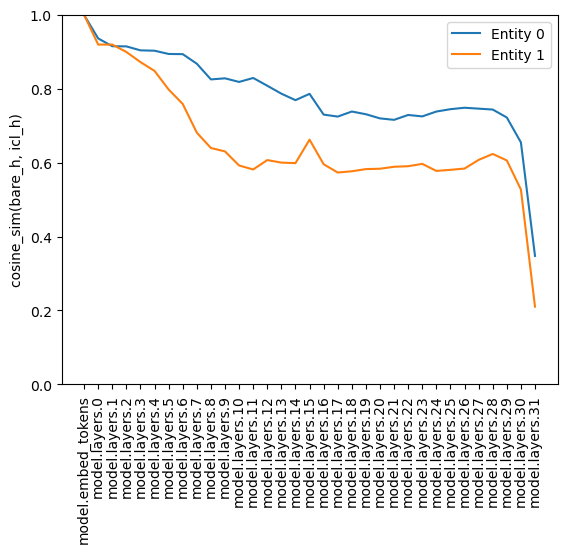

In [65]:
similarity_0 = []
similarity_1 = []

for layer in [mt.embedder_name] + mt.layer_names:
    entity_pos_0 = prompt.entity_ranges[0][1] - 1
    sim_0 = torch.cosine_similarity(
        bare_hs[0][(layer, entity_pos_0)], icl_hs[0][(layer, entity_pos_0)], dim=-1
    )

    similarity_0.append(sim_0.item())

    entity_pos_1 = prompt.entity_ranges[1][1] - 1
    sim_1 = torch.cosine_similarity(
        bare_hs[1][(layer, entity_pos_1)], icl_hs[1][(layer, entity_pos_1)], dim=-1
    )

    similarity_1.append(sim_1.item())

# print(f"{layer}: {sim_0.item()=}, {sim_1.item()=}")

from matplotlib import pyplot as plt

plt.plot(similarity_0, label="Entity 0")
plt.plot(similarity_1, label="Entity 1")

plt.legend()
plt.ylim(0, 1)
plt.ylabel("cosine_sim(bare_h, icl_h)")

plt.xticks(range(mt.n_layer + 1), [mt.embedder_name] + mt.layer_names, rotation=90)
plt.show()

### Use the corner as introspection point

2025-02-10 13:24:34 src.operators.estimators INFO     What is the nationality of X? Answer:  |>> self.placeholder_pos=7 | self.inputs['input_ids'].shape=torch.Size([1, 11])
[' British', ' American', ' French', ' German', ' Italian', ' Spanish', ' Russian', ' Chinese', ' Japanese', ' Indian']
2025-02-10 13:24:34 src.operators.estimators INFO     Initialized to [PredictedToken(token='1', prob=0.486572265625, logit=20.109375, token_id=16), PredictedToken(token='2', prob=0.168212890625, logit=19.046875, token_id=17), PredictedToken(token='3', prob=0.1036376953125, logit=18.5625, token_id=18), PredictedToken(token='10', prob=0.0445556640625, logit=17.71875, token_id=605), PredictedToken(token='4', prob=0.02423095703125, logit=17.109375, token_id=19)]


100%|██████████| 200/200 [00:17<00:00, 11.34it/s]


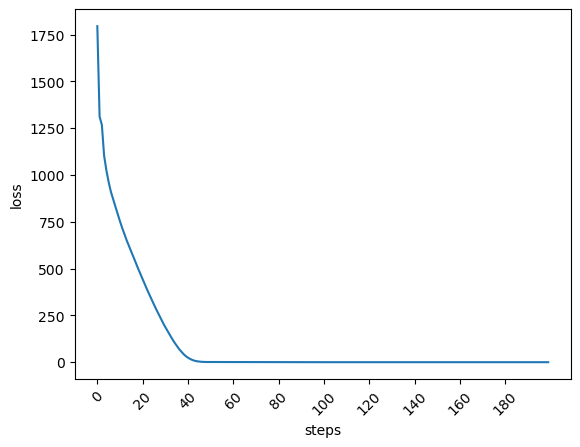

2025-02-10 13:24:52 src.operators.estimators INFO     Tuned to: [PredictedToken(token=' Japanese', prob=0.08056640625, logit=20.0, token_id=11002), PredictedToken(token=' Russian', prob=0.08056640625, logit=20.0, token_id=8690), PredictedToken(token=' Chinese', prob=0.08056640625, logit=20.0, token_id=8620), PredictedToken(token=' German', prob=0.07928466796875, logit=19.984375, token_id=6063), PredictedToken(token=' American', prob=0.07928466796875, logit=19.984375, token_id=3778)]


In [37]:
from src.operators.estimators import CornerEstimator

estimator = CornerEstimator(
    mt=mt,
    layer_name=mt.layer_names[2],
    verbose=True,
    prompt="What is the nationality of X? Answer: ",
    placeholder="X",
)

# with open(
#     os.path.join(
#         env_utils.DEFAULT_DATA_DIR,
#         "object_mappings",
#         "professions.json"
#         # "colors.json"
#     ), "r"
# ) as f:
#     objects = json.load(f)
# # objects = [f" {c}" for c in objects]
# objects = [" Christian", " Muslim", " Hindu", " Buddhist", " Sikh", " Jewish", " Atheist", " Agnostic", " Deist", " Pagan"]
# objects = [" red", " blue", " green", " yellow", " orange", " purple", " pink", " black", " white", " grey"]
objects = [
    " British",
    " American",
    " French",
    " German",
    " Italian",
    " Spanish",
    " Russian",
    " Chinese",
    " Japanese",
    " Indian",
]

token_indices = (
    mt.tokenizer(
        objects,
        add_special_tokens=False,
        return_tensors="pt",
        padding=True,
        padding_side="right",
    )
    .input_ids[:, 0]
    .tolist()
)
print([mt.tokenizer.decode(t) for t in token_indices])

corner = estimator.estimate(
    class_indices=token_indices,
    n_steps=200,
    # space="prob",
    target_val=20,
    # concept_subspace_regularizer=0.1
    weight_decay=5e-4,
)

In [66]:
placeholder_prompt.entity_ranges

((206, 207), (208, 209))

In [67]:
entities

('Rafael Nadal', 'Javier Bardem')

In [68]:
corner_pos = placeholder_prompt.entity_ranges[1][0]
entity_pos = placeholder_prompt.entity_ranges[0][0]

# corner_pos = placeholder_prompt.entity_ranges[0][0]
# entity_pos = placeholder_prompt.entity_ranges[1][0]

corner_patch = []
for layer in mt.layer_names:
    corner_patch.append(PatchSpec(location=(layer, corner_pos), patch=corner.corner))
    corner_patch.append(
        PatchSpec(
            location=(layer, entity_pos),
            patch=icl_hs[0][(layer, prompt.entity_ranges[0][1] - 1)],
            # patch = corner.corner
        )
    )


pred, track_ans = predict_next_token(
    mt=mt,
    inputs=TokenizerOutput(data=placeholder_prompt.tokenized),
    patches=corner_patch,
    k=20,
    token_of_interest=[token_indices],
)

pred

[[PredictedToken(token=' tennis', prob=0.51953125, logit=17.546875, token_id=32515),
  PredictedToken(token=' professional', prob=0.2132568359375, logit=16.65625, token_id=6721),
  PredictedToken(token=' athletes', prob=0.0212860107421875, logit=14.3515625, token_id=23579),
  PredictedToken(token=' Spanish', prob=0.0201416015625, logit=14.296875, token_id=15506),
  PredictedToken(token=' world', prob=0.016448974609375, logit=14.09375, token_id=1917),
  PredictedToken(token=' ranked', prob=0.0161895751953125, logit=14.078125, token_id=21682),
  PredictedToken(token=' active', prob=0.0141754150390625, logit=13.9453125, token_id=4642),
  PredictedToken(token=' top', prob=0.011749267578125, logit=13.7578125, token_id=1948),
  PredictedToken(token=' famous', prob=0.0088043212890625, logit=13.46875, token_id=11495),
  PredictedToken(token=' number', prob=0.00873565673828125, logit=13.4609375, token_id=1396),
  PredictedToken(token=' players', prob=0.007648468017578125, logit=13.328125, token

In [71]:
from src.functional import logit_lens

logit_lens(
    mt=mt,
    h=bare_hs[0][(mt.layer_names[25], prompt.entity_ranges[0][1] - 1)],
    interested_tokens=token_indices,
)

([PredictedToken(token=' Rafael', prob=0.06689453125, logit=10.5859375, token_id=55500),
  PredictedToken(token=' ATP', prob=0.0643310546875, logit=10.546875, token_id=67656),
  PredictedToken(token=' Roland', prob=0.028564453125, logit=9.734375, token_id=58906),
  PredictedToken(token=' tennis', prob=0.021392822265625, logit=9.4453125, token_id=32515),
  PredictedToken(token=' Wimbledon', prob=0.0208892822265625, logit=9.421875, token_id=91257)],
 {15506: (36,
   PredictedToken(token=' Spanish', prob=0.0016050338745117188, logit=6.85546875, token_id=15506)),
  8753: (167,
   PredictedToken(token=' French', prob=0.00035953521728515625, logit=5.359375, token_id=8753)),
  7904: (1637,
   PredictedToken(token=' Indian', prob=5.632638931274414e-05, logit=3.505859375, token_id=7904)),
  6063: (3358,
   PredictedToken(token=' German', prob=3.0875205993652344e-05, logit=2.904296875, token_id=6063)),
  15155: (4648,
   PredictedToken(token=' Italian', prob=2.3066997528076172e-05, logit=2.61328